# COGS 108 - EDA Checkpoint

# Names

- Yu Zhang
- Zhiying Guan
- Kaiwen Che
- Zhiwei Wang
- Ariane Yu

<a id='research_question'></a>
# Research Question

By comparing the changes in adoption trend between 2019 and 2020, how does social distancing, as a result of covid outbreak, affect pet adoption preferences, in terms of pets’ types, ages, and gender specifically? 

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from scipy.stats import chi2_contingency

In [2]:
## YOUR CODE HERE
a_sonoma = pd.read_csv('datasets/Sonoma_Adoption.csv')
a_longbeach = pd.read_csv('datasets/Longbeach_Adoption.csv')
a_austin = pd.read_csv('datasets/Austin_Adoption.csv')
a_bloom = pd.read_csv('datasets/Bloomington_Adoption.csv')
a_dallas = pd.read_csv('datasets/Dallas_Adoption')
a_norfolk = pd.read_csv('datasets/Norfolk_Adoption.csv')
a_sacramento = pd.read_csv('datasets/Sacramento_Adoption.csv')
 
ROUND_DECIMALS = 2

def sonoma_standardize_age(timedelta_in):
    output = float(timedelta_in.days)
    output = round(output / 365, ROUND_DECIMALS)
    return output

def standardize_age(agetime_in):
    try:
        str_in = str(agetime_in)
        str_in = str_in.lower()
        str_in = str_in.strip()
        
        if 'day' in str_in or 'days' in str_in:
            str_in = str_in.replace('days', '')
            str_in = str_in.replace('day', '')
            output = float(str_in)
            output = round(output / 365, ROUND_DECIMALS)
        elif 'w' in  str_in or 'week' in str_in or 'weeks' in str_in:
            str_in = str_in.replace('weeks', '')
            str_in = str_in.replace('week', '')
            str_in = str_in.replace('w', '')
            output = float(str_in)
            output = round(output / 52, ROUND_DECIMALS)
        elif 'month' in str_in or 'months' in str_in:
            str_in = str_in.replace('months', '')
            str_in = str_in.replace('month', '')
            output = float(str_in)
            output = round(output / 12, ROUND_DECIMALS)
        elif 'year' in str_in or 'years' in str_in or 'y' in str_in:
            str_in = str_in.replace('years', '')
            str_in = str_in.replace('year', '')
            str_in = str_in.replace('y', '')
            output = round(float(str_in), ROUND_DECIMALS)
        else:
            output = np.nan
    except:
        output = np.nan
        
    return output

# Overall change of adoption number:
def overall_adoption_change(df_in):
    df_2019 = df_in.loc[df_in['year']==2019]
    df_2020 = df_in.loc[df_in['year']==2020]
    animal_types = df_in['Type'].unique()
    
    overall_change = round(((df_2020.shape[0] - df_2019.shape[0]) / df_2019.shape[0]) * 100, ROUND_DECIMALS)
    print("Overall Change of Total Adoption Number From 2019 to 2020:", overall_change, "%")
    
    print("Change of Adoption Number by Type:")
    for animal in animal_types:
        if animal in df_2019['Type'].value_counts():
            animal_count_2019 = df_2019['Type'].value_counts()[animal]
        else:
            animal_count_2019 = 0
            
        if animal in df_2020['Type'].value_counts():
            animal_count_2020 = df_2020['Type'].value_counts()[animal]
        else:
            animal_count_2020 = 0 
            
        if (animal_count_2019 == 0) & (animal_count_2020 == 0):
            continue
        elif animal_count_2019 == 0:
            print("Adoption number of", animal.upper(), "from 2019 to 2020 increased by a number of", animal_count_2020)
        else:    
            count_change = round(((animal_count_2020 - animal_count_2019) / animal_count_2019) * 100, ROUND_DECIMALS)
            print("Adoption number of", animal.upper(), "from 2019 to 2020 changed by", count_change, "%")
    #print('=======================================================================================')
    

# Data Cleaning

To compare the changes of adoption trends before and after the start of COVID-19, we used Sonoma_Adoption, Longbeach_Adoption, and Austin_Adoption that were read from the csv files we found online. From Sonoma_Adoption, we extracted info of animals' Outcome Date, Type, Breed, Sex, Color, and Age in the Sonoma county. From Longbeach_Adoption, we extracted info of animals' Outcome Date, Animal Type, Sex, Primary Color, and Age in the Longbeach county. From Austin_Adoption, we extracted info of animals' DateTime, Animal Type, Breed, Sex upon Outcome, Color, and Age upon Outcome in the Austin county. By googling specifc animal breeds, we generalize abopted animals to species (e.g. rabbit, cat, dog, rodent). 

Outcome type: adoption <br> 
Outcome date: after 03/01/2020 <br> 
Left categories: Type, Sex, Age <br> 

In [3]:
animals = {'Rabbit Sh': 'Rabbit', 'Guinea Pig': 'Rodent', 'Rabbit Sh':'Rabbit', 'Californian':'Rabbit', 
           'English Spot Mix': 'Rabbit', 'Hamster': 'Rodent', 'Lionhead':'Rabbit', 'Hotot':'Rabbit', 'Mouse': 'Rodent',
          'Lop-Holland': 'Rabbit', 'Chinchilla-Stnd': 'Rodent', 'Rex':'Rabbit', 'Angora-French Mix':'Rabbit',
          'Rabbit Lh': 'Rabbit', 'Lionhead Mix': 'Rabbit', 'Rabbit Sh Mix': 'Rabbit', 'Rex Mix': 'Rabbit', 
           'Havana':'Rabbit', 'Lop-Mini/Hotot':'Rabbit', 'New Zealand Wht': 'Rabbit', 'Jersey Wooly':'Rabbit',
          'Dwarf Hotot':'Rabbit', 'Netherlnd Dwarf':'Rabbit', 'Rex-Mini': 'Rabbit', 'English Spot':'Rabbit',
          'Lop-Holland Mix':'Rabbit', 'Potbelly Pig': 'Livestock', 'Lop-Mini': 'Rabbit', 'Snake':'Reptile', 'Lizard':'Reptile',
          'Turtle': 'Reptile', 'HAVANA/MIX': 'Rabbit', 'RAT':'Rodent', 'Lop-Mini Mix': 'Rabbit', 'GUINEA PIG' : 'Rodent', 
          'CALIFORNIAN/MIX':'Rabbit', 'HOTOT':'Rabbit','CALIFORNIAN/MIX':'Rabbit', 'PIG':'Livestock', 'RABBIT SH':'Rabbit', 
           'HAVANA':'Rabbit', 'HOTOT/MIX':'Rabbit','ANGORA-SATIN':'Rabbit', 'REX':'Rabbit', 'AMERICAN/MIX':'Rabbit', 
          'LOP-AMER FUZZY': 'Rabbit', 'LOP-MINI' : 'Rabbit', 'SILVER/MIX' : 'Rabbit', 'DUTCH/MIX' : 'Rabbit', 
           'ENGLISH SPOT/MIX':'Rabbit', 'COCKATIEL':'Bird', 'RABBIT LH':'Rabbit', 'CALIFORNIAN':'Rabbit', 'DONKEY': 'Livestock',
          'SHEEP':'Livestock', 'GUINEA PIG':'Rodent', 'Mouse Mix':'Rodent', 'Ferret':'Rodent','New Zealand Wht Mix':'Rodent',
          'Rat':'Rodent', 'Havana Mix':'Rabbit','Ferret Mix': 'Rodent', 'Californian Mix':'Rabbit', 'Netherlnd Dwarf Mix':'Rabbit',
          'American':'Rabbit', 'American Mix':'Rabbit','Lop-Amer Fuzzy':'Rabbit', 'Flemish Giant Mix':'Rabbit', 
           'Chinchilla-Amer':'Rabbit', 'Pig Mix':'Livestock', 'Dutch':'Rabbit','Goat':'Livestock', 'Sugar Glider':'Rabbit',
          'Rex/Lop-English': 'Rabbit', 'Rex-Mini Mix': 'Rabbit', 'American Sable': 'Rabbit', 'Rabbit Lh Mix': 'Rabbit',
          'Sheep Mix': 'Livestock', 'Pig':'Livestock', 'Beveren Mix':'Rabbit','GUINEA PIG':'Rodent','Polish':'Rabbit',
          'House Rabbit':'Rabbit','Gerbil':'Rodent','Chinchilla':'Rodent','Wildlife - other':'Wildlife'}


In [4]:
#Sonoma County_adoption
a_sonoma['Outcome Date'] = pd.to_datetime(a_sonoma['Outcome Date'])
a_sonoma['Date Of Birth'] = pd.to_datetime(a_sonoma['Date Of Birth'])

a_sonoma_clean = a_sonoma[a_sonoma['Outcome Type'] == 'ADOPTION']
a_sonoma_clean = a_sonoma_clean.loc[((
    a_sonoma_clean['Outcome Date'] > pd.to_datetime("2019/01/01"))&(
    a_sonoma_clean['Outcome Date'] < pd.to_datetime("2020/12/31")))]

a_sonoma_clean['Age'] = a_sonoma_clean['Outcome Date']-a_sonoma_clean['Date Of Birth']

a_sonoma_clean = a_sonoma_clean[["Outcome Date","Type","Breed", "Sex" ,"Age"]]
a_sonoma_clean = a_sonoma_clean.dropna()

a_sonoma_clean['Age'] = a_sonoma_clean['Age'].apply(sonoma_standardize_age)

a_sonoma_clean['Type'] = np.where(a_sonoma_clean['Type']== 'OTHER', a_sonoma_clean['Breed'], a_sonoma_clean['Type'])
a_sonoma_clean['Type'] = a_sonoma_clean['Type'].replace(animals)

a_sonoma_clean = a_sonoma_clean[["Outcome Date","Type", "Sex","Age"]]
a_sonoma_clean = a_sonoma_clean.rename(columns = {'Outcome Date':'Date'})

a_sonoma_clean = a_sonoma_clean.reset_index()
a_sonoma_clean = a_sonoma_clean.drop(['index'],axis = 1)
a_sonoma_clean.head()
#a_sonoma_clean['Type'].unique()

,Date,Type,Sex,Age
0,2019-01-04,DOG,Spayed,1.51
1,2020-02-11,DOG,Neutered,0.16
2,2019-02-16,DOG,Spayed,2.14
3,2019-01-10,CAT,Neutered,3.02
4,2020-10-14,DOG,Neutered,10.24


In [5]:
#Long Beach County_adoption
a_longbeach['Outcome Date'] = pd.to_datetime(a_longbeach['Outcome Date'])

a_longbeach_clean = a_longbeach[a_longbeach['Outcome Type'] == 'ADOPTION']
a_longbeach_clean = a_longbeach_clean.loc[((
    a_longbeach_clean['Outcome Date'] > pd.to_datetime("2019/01/01"))&(
    a_longbeach_clean['Outcome Date'] < pd.to_datetime("2020/12/31")))]

a_longbeach_clean = a_longbeach_clean[["Outcome Date","Animal Type", "Sex", "Age"]]
a_longbeach_clean = a_longbeach_clean.dropna()
a_longbeach_clean = a_longbeach_clean[a_longbeach_clean['Animal Type'] != 'OTHER']

a_longbeach_clean = a_longbeach_clean.rename(columns = {'Outcome Date' :'Date' , 
                                                  'Animal Type' : 'Type'})

a_longbeach_clean = a_longbeach_clean.reset_index()
a_longbeach_clean = a_longbeach_clean.drop(['index'],axis = 1)
a_longbeach_clean.head()
#a_longbeach_clean['Type'].unique()

,Date,Type,Sex,Age
0,2019-02-12,CAT,Neutered,5.0
1,2019-02-12,DOG,Neutered,6.0
2,2019-06-28,DOG,Neutered,6.0
3,2019-02-05,CAT,Neutered,4.0
4,2019-02-05,CAT,Spayed,4.0


In [6]:
#Austin County_adoption
a_austin['DateTime'] = pd.to_datetime(a_austin['DateTime'])

a_austin_clean = a_austin[a_austin['Outcome Type'] == 'Adoption']
a_austin_clean = a_austin_clean.loc[((
    a_austin_clean['DateTime'] > pd.to_datetime("2019/01/01"))&(
    a_austin_clean['DateTime'] < pd.to_datetime("2020/12/31")))]
a_austin_clean = a_austin_clean[["DateTime","Animal Type","Breed", "Sex upon Outcome","Age upon Outcome"]]
a_austin_clean = a_austin_clean.dropna()
a_austin_clean['Age upon Outcome'] = a_austin_clean['Age upon Outcome'].apply(standardize_age)

a_austin_clean['Animal Type'] = np.where(a_austin_clean['Animal Type'] == 'Other', a_austin_clean['Breed'], a_austin_clean['Animal Type'])
a_austin_clean['Animal Type'] = np.where(a_austin_clean['Animal Type'] == 'Livestock', a_austin_clean['Breed'], a_austin_clean['Animal Type'])
a_austin_clean['Animal Type'] = a_austin_clean['Animal Type'].replace(animals)

def sex(row):
    if row['Sex upon Outcome'] == "Spayed Female":
        val = 'Spayed'
    elif row['Sex upon Outcome'] == "Neutered Male":
        val = 'Neutered'
    elif row['Sex upon Outcome'] == "Intact Female":
        val = 'Female'
    else:
        val = 'Male'
    return val
a_austin_clean['Sex upon Outcome'] = a_austin_clean.apply(sex, axis=1)
a_austin_clean = a_austin_clean[["DateTime","Animal Type","Sex upon Outcome","Age upon Outcome"]]
a_austin_clean = a_austin_clean.rename(columns = {'Sex upon Outcome':'Sex', 
                                                  'Age upon Outcome':'Age' , 
                                                  'Animal Type':'Type',
                                                 'DateTime' : 'Date'})

from datetime import datetime
from datetime import date
def rem_time(d):
    s = date(d.year,d.month, d.day)
    return s

a_austin_clean['Date'] = a_austin_clean['Date'].apply(rem_time)


a_austin_clean = a_austin_clean.reset_index()
a_austin_clean = a_austin_clean.drop(['index'],axis = 1)
a_austin_clean.head()


,Date,Type,Sex,Age
0,2020-10-05,Dog,Spayed,7.00
1,2020-05-06,Dog,Neutered,2.00
2,2019-08-16,Cat,Neutered,0.25
3,2020-03-05,Dog,Neutered,10.00
4,2019-04-23,Dog,Neutered,0.17


In [7]:
#Bloomington
a_bloom['movementdate'] = pd.to_datetime(a_bloom['movementdate'])
a_bloom_clean = a_bloom[a_bloom['movementtype'] == 'Adoption']
a_bloom_clean = a_bloom_clean.loc[((
    a_bloom_clean['movementdate'] > pd.to_datetime("2019/01/01"))&(
    a_bloom_clean['movementdate'] < pd.to_datetime("2020/12/31")))]

a_bloom_clean = a_bloom_clean[["movementdate","speciesname",'sexname','animalage']]

a_bloom_clean['speciesname'] = a_bloom_clean['speciesname'].replace(animals)
a_bloom_clean = a_bloom_clean.drop(a_bloom_clean[a_bloom_clean['sexname']=='Unknown'].index)

def bloom_standardize_age(agetime_in):
    try:
        str_in = str(agetime_in)
        str_in = str_in.lower()
        str_in = str_in.strip()
        str_in = str_in.replace('.', '')
        
        if 'day' in str_in or 'days' in str_in:
            str_in = str_in.replace('days', '')
            str_in = str_in.replace('day', '')
            output = float(str_in)
            output = round(output / 365, ROUND_DECIMALS)
        elif 'week' in str_in or 'weeks' in str_in:
            str_in = str_in.replace('weeks', '')
            str_in = str_in.replace('week', '')
            output = float(str_in)
            output = round(output / 52, ROUND_DECIMALS)
        
        elif 'year' in str_in or 'years' in str_in:
            str_in = str_in.replace('months', '')
            str_in = str_in.replace('month', '')
            str_in = str_in.replace('years', '')
            str_in = str_in.replace('year', '')
            num = list(str_in.split('  '))
            flo = [float(x) for x in num]
            output = round(flo[1] / 12, ROUND_DECIMALS)+round(flo[0], ROUND_DECIMALS)
            
        elif 'month' in str_in or 'months' in str_in:
            str_in = str_in.replace('months', '')
            str_in = str_in.replace('month', '')
            output = float(str_in)
            output = round(output / 12, ROUND_DECIMALS)
        
        else:
            output = np.nan
    except:
        output = np.nan
    return output
a_bloom_clean['animalage'] = a_bloom_clean['animalage'].apply(bloom_standardize_age)

a_bloom_clean = a_bloom_clean.rename(columns = {'movementdate':'Date', 
                                                'speciesname':'Type',
                                                'sexname':'Sex', 
                                                'animalage':'Age'})

a_bloom_clean = a_bloom_clean.reset_index()
a_bloom_clean.head()


,index,Date,Type,Sex,Age
0,57,2020-07-06,Cat,Male,8.08
1,107,2019-03-22,Dog,Male,5.75
2,109,2019-06-12,Dog,Male,5.75
3,181,2020-01-18,Dog,Male,5.00
4,182,2020-07-25,Dog,Male,5.00


In [8]:
a_bloom_clean['year'] = pd.DatetimeIndex(a_bloom_clean['Date']).year
bloom_2019 = a_bloom_clean.loc[a_bloom_clean['year'] == 2019]
bloom_2020 = a_bloom_clean.loc[a_bloom_clean['year'] == 2020]

In [9]:
# Temp
a_norfolk.shape
a_norfolk.head()

,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Day of the Week,Outcome Day of the Week
0,A000218,FATTY,Cat,Neutered Male,0.0,3.0,DOMESTIC LH,GRAY,052355562,12/13/2020,Owner Surrendered,Over the Counter,Adoption,NaN,12/18/2020,Sunday,Friday
1,A001474,CHARLES,Dog,Neutered Male,1.0,0.0,LABRADOR RETR,YELLOW,982000150016071,10/19/2021,Stray,Over the Counter,Return to Owner,Walk-In,10/19/2021,Tuesday,Tuesday
2,A001699,SYLVESTER,Dog,Neutered Male,13.0,NaN,YORKSHIRE TERR,BLACK,101625810,01/05/2019,Stray,Over the Counter,Return to Owner,NaN,01/05/2019,Saturday,Saturday
3,A001699,SYLVESTER,Dog,Neutered Male,13.0,NaN,YORKSHIRE TERR,BLACK,101625810,01/05/2019,Owner Surrendered,Over the Counter,Transfer,Rescue Group,01/22/2019,Saturday,Tuesday
4,A002332,CHLOE,Dog,Spayed Female,0.0,0.0,POODLE MIN,BLACK,NaN,10/23/2021,Disposal Request of Deceased Pet,Over the Counter,Disposal of Deceased Pet,NaN,10/23/2021,Saturday,Saturday


In [10]:
#Norfolk County_adoption
a_norfolk['Outcome Date'] = pd.to_datetime(a_norfolk['Outcome Date'])
a_norfolk_clean = a_norfolk[a_norfolk['Outcome Type'] == 'Adoption']
a_norfolk_clean = a_norfolk_clean.loc[((
    a_norfolk_clean['Outcome Date'] > pd.to_datetime("2019/01/01"))&(
    a_norfolk_clean['Outcome Date'] < pd.to_datetime("2020/12/31")))]

a_norfolk_clean['Age'] = a_norfolk_clean['Years Old']

a_norfolk_clean = a_norfolk_clean[["Outcome Date","Animal Type", "Sex" ,"Age"]]
a_norfolk_clean = a_norfolk_clean.dropna()

a_norfolk_clean['Animal Type'] = a_norfolk_clean['Animal Type'].replace(animals)

a_norfolk_clean = a_norfolk_clean[["Outcome Date","Animal Type", "Sex","Age"]]
a_norfolk_clean = a_norfolk_clean.rename(columns = {'Outcome Date':'Date', 
                                                'Animal Type':'Type'})
a_norfolk_clean = a_norfolk_clean.reset_index()
a_norfolk_clean = a_norfolk_clean.drop(['index'],axis = 1)

def sex_norfolk(row):
    if row['Sex'] == "Spayed Female":
        val = 'Spayed'
    elif row['Sex'] == "Neutered Male":
        val = 'Neutered'
    elif row['Sex'] == "Female":
        val = 'Female'
    else:
        val = 'Male'
    return val
a_norfolk_clean['Sex'] = a_norfolk_clean.apply(sex_norfolk, axis=1)

a_norfolk_clean.head()
a_norfolk_clean['Type'].unique()
a_norfolk_clean

,Date,Type,Sex,Age
0,2020-12-18,Cat,Neutered,0.0
1,2019-04-04,Cat,Neutered,0.0
2,2019-02-17,Cat,Neutered,1.0
3,2019-06-26,Cat,Spayed,0.0
4,2020-10-21,Cat,Neutered,1.0
...,...,...,...,...
1838,2020-12-15,Dog,Spayed,2.0
1839,2020-12-06,Other,Female,4.0
1840,2020-12-28,Dog,Spayed,1.0
1841,2020-12-17,Cat,Spayed,5.0


In [11]:
a_norfolk_clean['year'] = pd.DatetimeIndex(a_norfolk_clean['Date']).year
norfolk_2019 = a_norfolk_clean.loc[a_norfolk_clean['year'] == 2019]
norfolk_2020 = a_norfolk_clean.loc[a_norfolk_clean['year'] == 2020]

In [12]:
a_sacramento['Outcome_Date'] = pd.to_datetime(a_sacramento['Outcome_Date'])
a_sacramento_clean = a_sacramento[['Outcome_Date','Animal_Type','Outcome_Type', 'Animal_Age','Animal_Sex']]
a_sacramento_clean = a_sacramento_clean.rename(columns = {'Outcome_Date':'Date',
                                                          'Animal_Type':'Type',
                                                          'Outcome_Type':'Outcome',
                                                          'Animal_Age':'Age',
                                                          'Animal_Sex':'Sex'})
a_sacramento_clean = a_sacramento_clean.dropna()
a_sacramento_clean = a_sacramento_clean.loc[a_sacramento_clean['Outcome']=='ADOPTION'].reset_index()
a_sacramento_clean['year'] = pd.DatetimeIndex(a_sacramento_clean['Date']).year
a_sacramento_clean = a_sacramento_clean.loc[(a_sacramento_clean['year']==2019)|(a_sacramento_clean['year']==2020)]
a_sacramento_clean = a_sacramento_clean.reset_index()
#a_sacramento_clean['Age'] = a_sacramento_clean['Age'].apply(lambda x: x.replace('Y',''))
a_sacramento_clean['Age'] = a_sacramento_clean['Age'].apply(standardize_age)

def age_sacramento_standardize(row):
    if 'Y' in row:
        res = row.replace('Y','')
        res = float(res)
    if 'W' in row:
        res = row.replace('W', '')
        res = float(res) / 52
    return res

a_sacramento_clean = a_sacramento_clean.drop(['level_0','index'],axis = 1)
a_sacramento_clean['Date'] = a_sacramento_clean['Date'].dt.date
a_sacramento_clean = a_sacramento_clean.drop(['Outcome'],axis = 1)
a_sacramento_clean['Type'].unique()
def sex_sacramento(row):
    if row['Sex'] == "S":
        val = 'Spayed'
    elif row['Sex'] == "N":
        val = 'Neutered'
    elif row['Sex'] == "F":
        val = 'Female'
    else:
        val = 'Male'
    return val
a_sacramento_clean['Sex'] = a_sacramento_clean.apply(sex_sacramento, axis=1)
a_sacramento_clean
#应该用intake date 还是用outcome date

,Date,Type,Age,Sex,year
0,2019-12-02,DOG,15.0,Spayed,2019
1,2020-05-30,DOG,14.0,Spayed,2020
2,2020-02-11,DOG,15.0,Spayed,2020
3,2020-08-30,DOG,13.0,Neutered,2020
4,2020-03-10,DOG,13.0,Spayed,2020
...,...,...,...,...,...
3706,2019-12-07,DOG,3.0,Spayed,2019
3707,2020-01-19,DOG,6.0,Spayed,2020
3708,2020-01-10,DOG,6.0,Spayed,2020
3709,2020-03-10,DOG,3.0,Neutered,2020


In [13]:
a_sacramento_clean['year'] = pd.DatetimeIndex(a_sacramento_clean['Date']).year
sacramento_2019 = a_sacramento_clean.loc[a_sacramento_clean['year'] == 2019]
sacramento_2020 = a_sacramento_clean.loc[a_sacramento_clean['year'] == 2020]

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section



For each of pet adoption dataset in three regions, we splitted it into subsets of data in 2019 and in 2020. Then, we took a closer look at the the trends of pet adoption in 2019 and 2020 side by side. 

In [14]:
# Long beach 
a_longbeach_clean = a_longbeach_clean.sort_values(by='Date')
a_longbeach_clean['year'] = pd.DatetimeIndex(a_longbeach_clean['Date']).year
a_longbeach_clean = a_longbeach_clean.drop(a_longbeach_clean[a_longbeach_clean['Sex']=='Unknown'].index)
order=['DOG', 'CAT','RABBIT','REPTILE', 'BIRD', 'RODENT','LIVESTOCK']
a_longbeach_clean

,Date,Type,Sex,Age,year
604,2019-01-02,RABBIT,Neutered,5.0,2019
1361,2019-01-02,DOG,Spayed,12.0,2019
22,2019-01-03,DOG,Male,4.0,2019
607,2019-01-03,CAT,Neutered,4.0,2019
1355,2019-01-03,CAT,Neutered,5.0,2019
...,...,...,...,...,...
579,2020-12-23,CAT,Spayed,2.0,2020
1080,2020-12-24,CAT,Neutered,11.0,2020
1338,2020-12-24,CAT,Spayed,2.0,2020
584,2020-12-26,CAT,Spayed,2.0,2020


In [15]:
longbeach_2019 = a_longbeach_clean.loc[a_longbeach_clean['year']==2019]
longbeach_2020 = a_longbeach_clean.loc[a_longbeach_clean['year']==2020]

Shown below is a bar graph comparing the total adoption of various pets in Long Beach in 2019 and 2020. Except bird, there are observable decreases in adopting all the types of pets after covid start in 2020. For both years, more cats were adopted than other pet types, while dog was the second perferred pets for adoption. Adoptions for all other types were much less. 

<AxesSubplot:xlabel='Type', ylabel='count'>

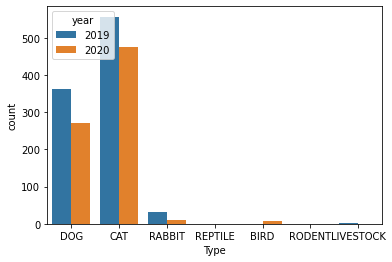

In [16]:
sns.countplot(data = a_longbeach_clean, x = 'Type', hue = 'year',order=order)

Grouped by pet types, the sex differences in adopted pets were illustrated in this graph. In general, less intact cats and dogs were adopted after the start of the covid and all birds adopted in 2020 seemed to be all intact in Long Beach. 

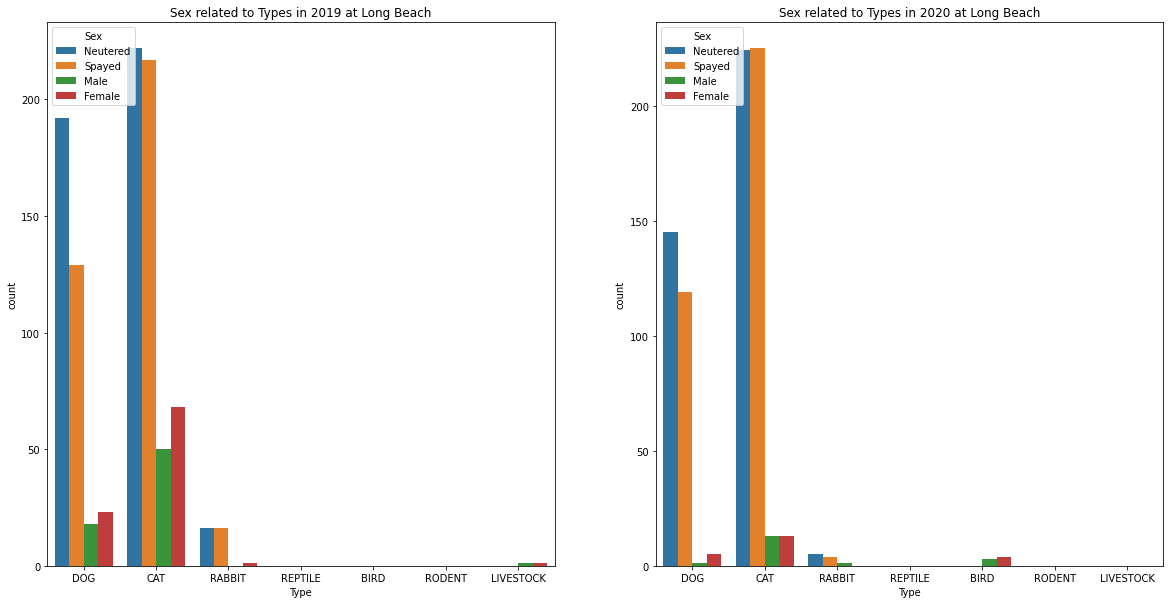

In [17]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
ax1 = sns.countplot(data = longbeach_2019, x = 'Type',hue = 'Sex', ax = axes[0], order=order)
ax2 = sns.countplot(data = longbeach_2020, x = 'Type',hue = 'Sex', ax = axes[1], order=order)
ax1.title.set_text('Sex related to Types in 2019 at Long Beach')
ax2.title.set_text('Sex related to Types in 2020 at Long Beach')

Ages of adopted pets in Long Beach seemed to be skewed to right in both 2019 and 2020. People seemed to have a consistent preference to young cats, while their preferred ages for dogs seemed to be about 1-2 years older than cats. 

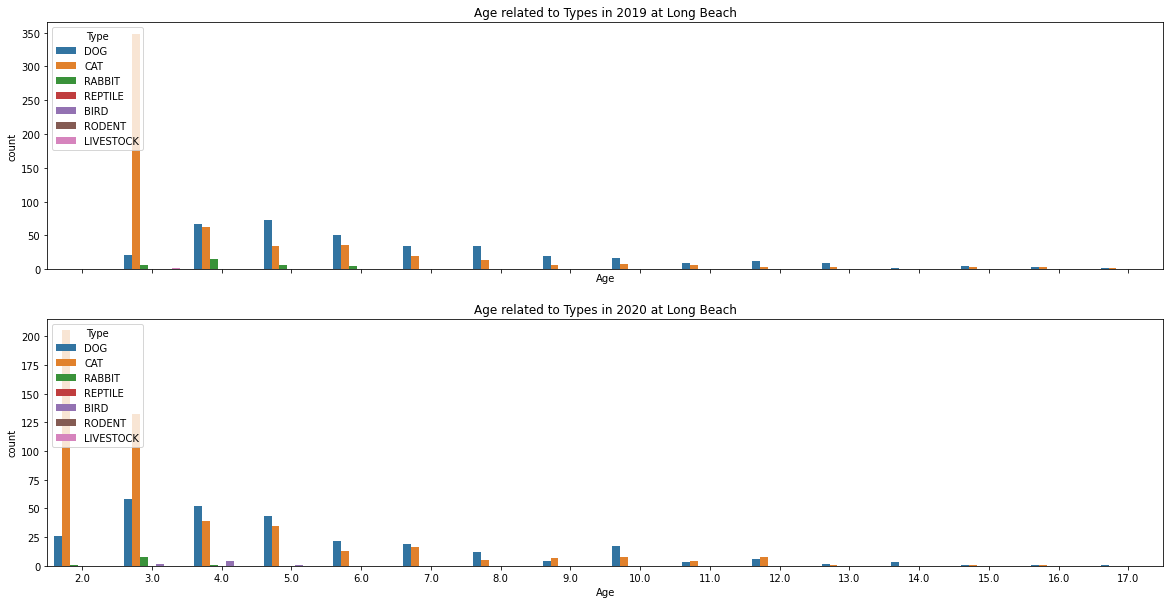

In [18]:

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,10))
ax1 = sns.countplot(data = longbeach_2019, x = 'Age',hue = 'Type', ax = axes[0],hue_order=order)
ax2 = sns.countplot(data = longbeach_2020, x = 'Age',hue = 'Type', ax = axes[1],hue_order=order)
ax1.title.set_text('Age related to Types in 2019 at Long Beach')
ax2.title.set_text('Age related to Types in 2020 at Long Beach')

In [19]:
# Basic Statistical analysis
overall_adoption_change(a_longbeach_clean)

Overall Change of Total Adoption Number From 2019 to 2020: -20.33 %
Change of Adoption Number by Type:
Adoption number of RABBIT from 2019 to 2020 changed by -69.7 %
Adoption number of DOG from 2019 to 2020 changed by -25.41 %
Adoption number of CAT from 2019 to 2020 changed by -14.72 %
Adoption number of GUINEA PIG from 2019 to 2020 changed by -60.0 %
Adoption number of LIVESTOCK from 2019 to 2020 changed by -100.0 %
Adoption number of BIRD from 2019 to 2020 increased by a number of 7


Same data processing steps were used to make subsets of pet adoptions in 2019 and 2020 for sonoma.

In [20]:
#Sonoma
a_sonoma_clean = a_sonoma_clean.sort_values(by='Date')
a_sonoma_clean['year'] = pd.DatetimeIndex(a_sonoma_clean['Date']).year
a_sonoma_clean

,Date,Type,Sex,Age,year
478,2019-01-02,DOG,Neutered,2.07,2019
140,2019-01-02,DOG,Spayed,1.64,2019
761,2019-01-02,CAT,Spayed,1.56,2019
524,2019-01-02,DOG,Neutered,1.66,2019
416,2019-01-02,DOG,Neutered,1.79,2019
...,...,...,...,...,...
421,2020-12-19,DOG,Neutered,1.04,2020
555,2020-12-23,DOG,Neutered,6.12,2020
309,2020-12-24,DOG,Spayed,0.56,2020
326,2020-12-24,DOG,Spayed,2.06,2020


In [21]:
sonoma_2019 = a_sonoma_clean.loc[a_sonoma_clean['year']==2019]
sonoma_2020 = a_sonoma_clean.loc[a_sonoma_clean['year']==2020]

A dramatic decline in pet adoption was observed in sonoma after covid starts in 2020, but the preference towards cat and dog adoptions proceeds. 

<AxesSubplot:xlabel='Type', ylabel='count'>

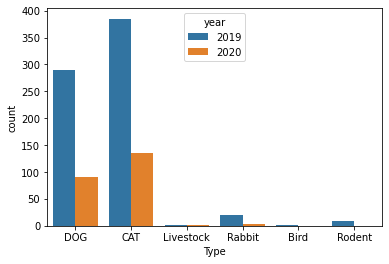

In [22]:
sns.countplot(data = a_sonoma_clean, x = 'Type', hue = 'year')

Mostly pets adopted in Sonoma seemed to be already neutered or spayed. There seemed to be a preference towards spayed cats and neutered dogs in 2020, while people adopted more neutered cats and spayed dogs in 2019. 

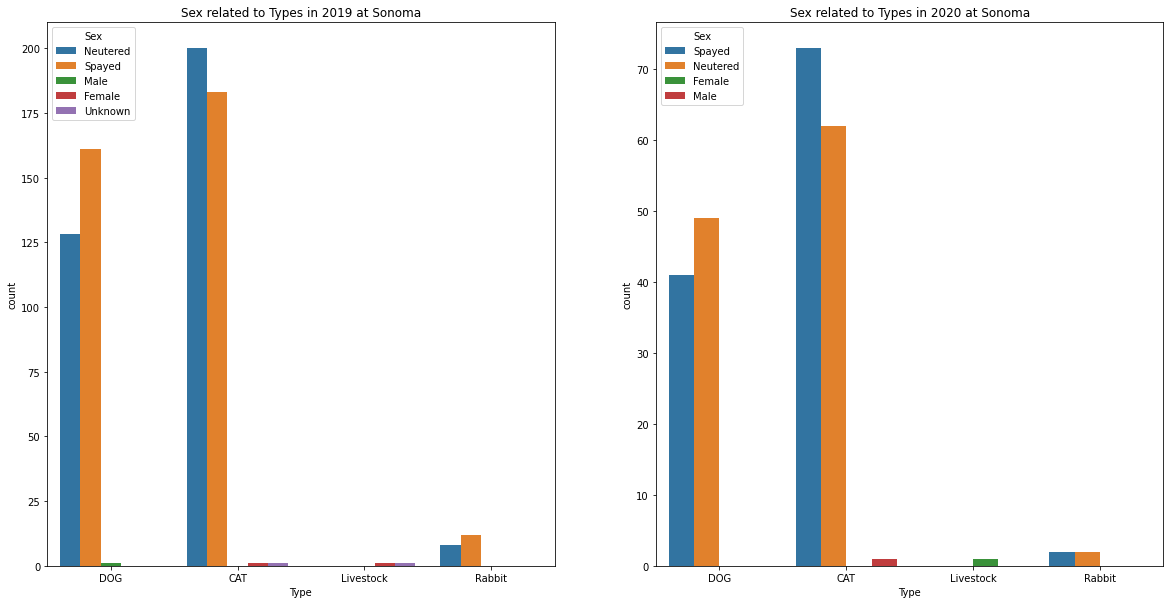

In [23]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
ax1 = sns.countplot(data = sonoma_2019, x = 'Type',hue = 'Sex', ax = axes[0])
ax2 = sns.countplot(data = sonoma_2020, x = 'Type',hue = 'Sex', ax = axes[1])
ax1.title.set_text('Sex related to Types in 2019 at Sonoma')
ax2.title.set_text('Sex related to Types in 2020 at Sonoma')

Age preferences towards adoptable pets seemed to hold true for people in sonoma. 

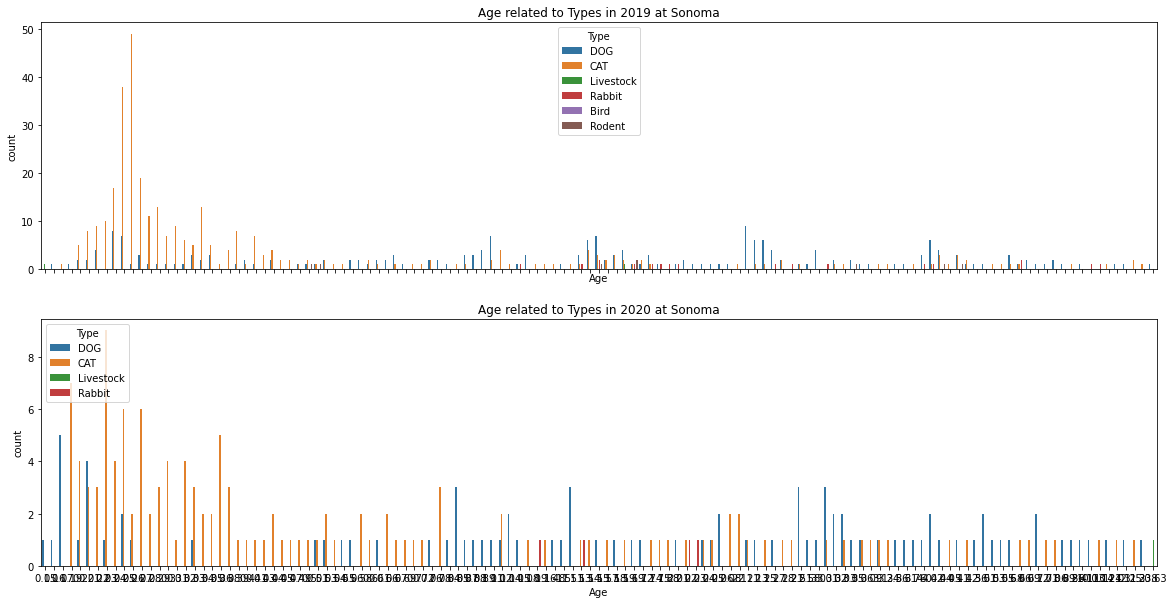

In [24]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,10))
ax1 = sns.countplot(data = sonoma_2019, x = 'Age',hue = 'Type', ax = axes[0])
ax2 = sns.countplot(data = sonoma_2020, x = 'Age',hue = 'Type', ax = axes[1])
ax1.title.set_text('Age related to Types in 2019 at Sonoma')
ax2.title.set_text('Age related to Types in 2020 at Sonoma')

<AxesSubplot:ylabel='Age'>

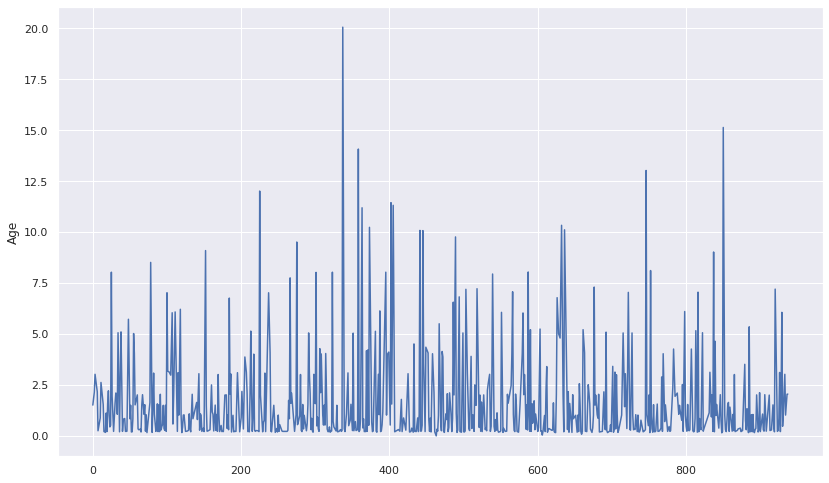

In [83]:
sns.lineplot(data=sonoma_2019["Age"])

In [25]:
# Basic Statistical analysis
overall_adoption_change(a_sonoma_clean)

Overall Change of Total Adoption Number From 2019 to 2020: -67.33 %
Change of Adoption Number by Type:
Adoption number of DOG from 2019 to 2020 changed by -68.97 %
Adoption number of CAT from 2019 to 2020 changed by -64.68 %
Adoption number of LIVESTOCK from 2019 to 2020 changed by -50.0 %
Adoption number of RABBIT from 2019 to 2020 changed by -80.0 %
Adoption number of BIRD from 2019 to 2020 changed by -100.0 %
Adoption number of RODENT from 2019 to 2020 changed by -100.0 %


Subsets of Austin were also generated by year. 

In [26]:
# Austin
a_austin_clean['year'] = pd.DatetimeIndex(a_austin_clean['Date']).year

In addition to decreased adoption counts, people seemed to have a preference to cats in 2019, while their preference  shifted to dogs in 2020. 

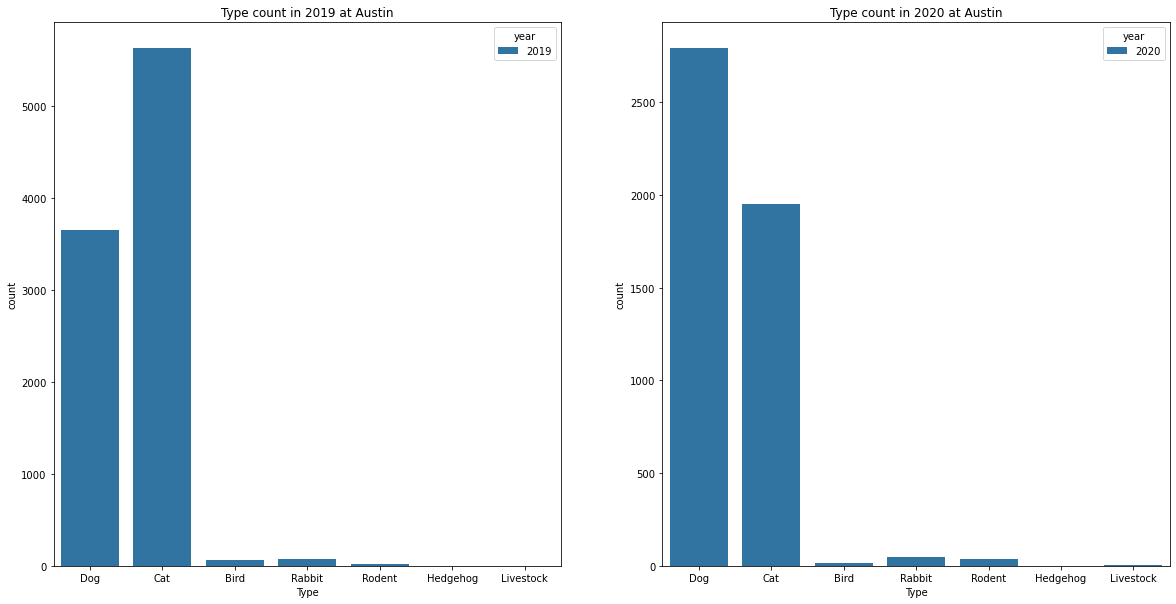

In [27]:
# Type 2019 vs 2020
austin_2019 = a_austin_clean[a_austin_clean['year'] == 2019]
austin_2020 = a_austin_clean[a_austin_clean['year'] == 2020]

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
ax1 = sns.countplot(data = austin_2019, x = 'Type', hue = 'year', ax = axes[0])
ax2 = sns.countplot(data = austin_2020, x = 'Type', hue = 'year',ax = axes[1])
ax1.title.set_text('Type count in 2019 at Austin')
ax2.title.set_text('Type count in 2020 at Austin')

Like in other regions, people in Austin have a preference towards really young cats, and their preferred age of adopted dogs seemed to be about 1 year older than which of cats. 

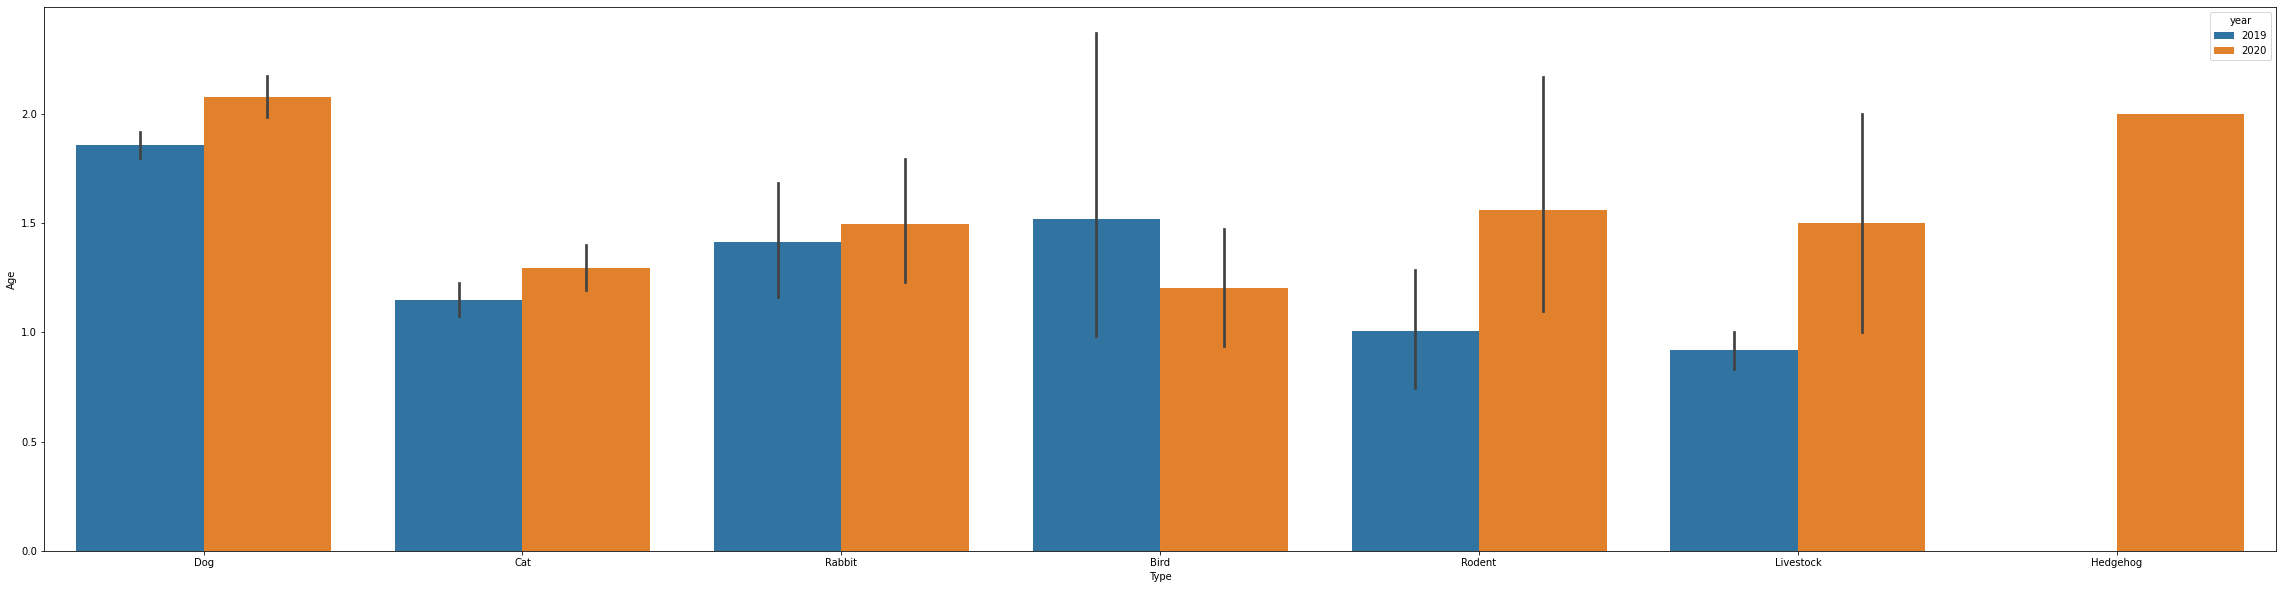

In [28]:
# Age by type in 2019 vs 2020
austin_two_year = a_austin_clean[(a_austin_clean['year'] == 2019) | (a_austin_clean['year'] == 2020)]

fig, axes = plt.subplots(figsize=(40,10))
Age_compare = sns.barplot(x="Type", y="Age", hue="year", data=austin_two_year)

There seemed to be an increased preference towards neutered dogs in 2020. In Austin, people seemed to consistently prefer neutered cats. 

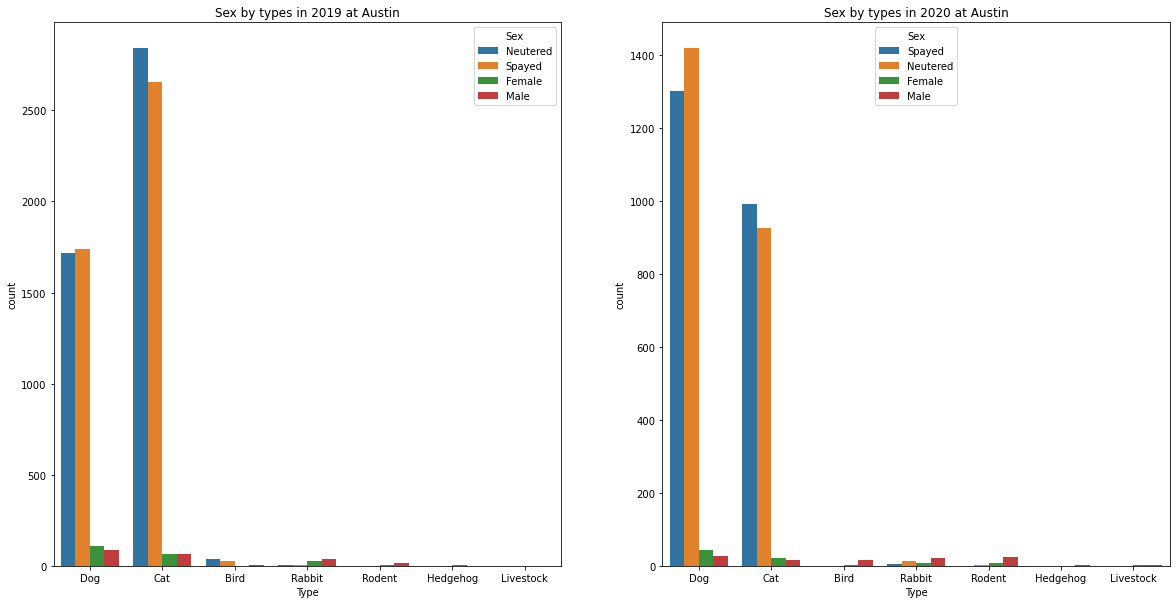

In [29]:
# Sex by type in 2019 vs 2020
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
ax1 = sns.countplot(data = austin_2019, x = 'Type',hue = 'Sex', ax = axes[0])
ax2 = sns.countplot(data = austin_2020, x = 'Type',hue = 'Sex',ax = axes[1])
ax1.title.set_text('Sex by types in 2019 at Austin')
ax2.title.set_text('Sex by types in 2020 at Austin')

In [30]:
# Basic Statistical analysis
overall_adoption_change(a_austin_clean)

Overall Change of Total Adoption Number From 2019 to 2020: -48.65 %
Change of Adoption Number by Type:
Adoption number of DOG from 2019 to 2020 changed by -50.4 %
Adoption number of CAT from 2019 to 2020 changed by -46.52 %
Adoption number of RABBIT from 2019 to 2020 changed by -28.36 %
Adoption number of BIRD from 2019 to 2020 changed by -10.53 %
Adoption number of RODENT from 2019 to 2020 changed by -51.39 %
Adoption number of LIVESTOCK from 2019 to 2020 changed by -33.33 %
Adoption number of HEDGEHOG from 2019 to 2020 increased by a number of 1


# Combine All the datasets

After looking at differences in pet adoption trends in different regions, we combined them into a larger dataset. 

In [31]:
# Combining dataset from six regions
combined_2019 = pd.concat([longbeach_2019, sonoma_2019, austin_2019, norfolk_2019, sacramento_2019, bloom_2019], ignore_index=True)
combined_2020 = pd.concat([longbeach_2020, sonoma_2020, austin_2020, norfolk_2020, sacramento_2020, bloom_2020], ignore_index=True)
combined_2019['Type'] = combined_2019['Type'].str.upper()
combined_2020['Type'] = combined_2020['Type'].str.upper()
combined_total = pd.concat([combined_2019, combined_2020], ignore_index=True)
# Drop index and any null in the data frame
combined_total = combined_total.drop(['index'],axis = 1)
combined_total = combined_total.dropna(axis='rows')
# Drop Unknown from Sex columns
combined_total = combined_total[combined_total['Sex']!='Unknown']

In [32]:
order_total = ['DOG', 'CAT','RABBIT',  'GUINEA PIG', 'LIVESTOCK', 'BIRD','RODENT', 'OTHER', 'HEDGEHOG', 'WILDLIFE', 'REPTILE']

Decreases in pet adoption were well illustrated this combined bar graph. Dog and cat adoptions almost decreaed by 50% by counts.

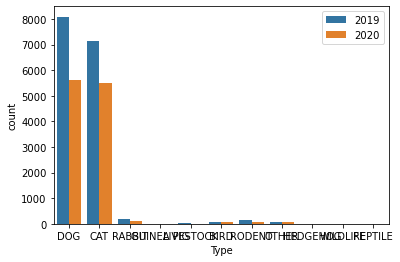

In [33]:
sns.countplot(data = combined_total, x = 'Type', hue = 'year',order = order_total )
plt.legend(loc = 'upper right')

People's preference towards sex of adoptable pets seemed to be consistent across pet types. 

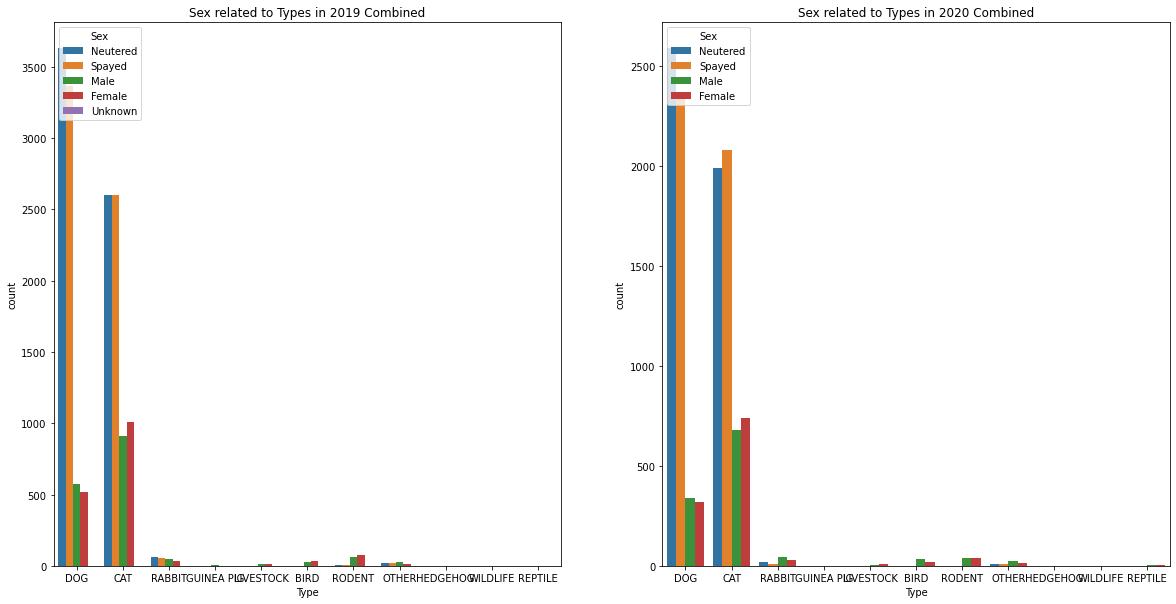

In [34]:
# Sex by type in 2019 vs 2020
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
ax1 = sns.countplot(data = combined_2019, x = 'Type',hue = 'Sex', ax = axes[0], order=order_total)
ax2 = sns.countplot(data = combined_2020, x = 'Type',hue = 'Sex', ax = axes[1], order=order_total)
ax1.title.set_text('Sex related to Types in 2019 Combined')
ax2.title.set_text('Sex related to Types in 2020 Combined')


In [35]:
combined_total['Age'].max()

30.63

([<matplotlib.axis.XTick at 0x7ff3424f5d00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

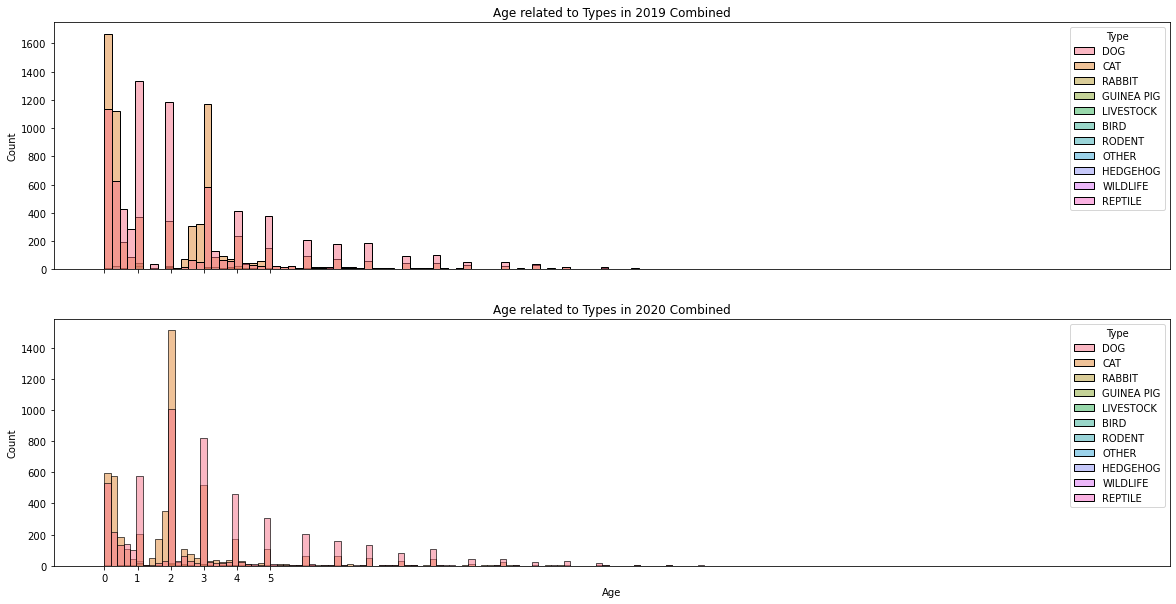

In [36]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,10))
ax1 = sns.histplot(data = combined_2019, x = 'Age',hue = 'Type', ax = axes[0],hue_order=order_total)
ax2 = sns.histplot(data = combined_2020, x = 'Age',hue = 'Type', ax = axes[1],hue_order=order_total)
ax1.title.set_text('Age related to Types in 2019 Combined')
ax2.title.set_text('Age related to Types in 2020 Combined')
plt.xticks(range(6))

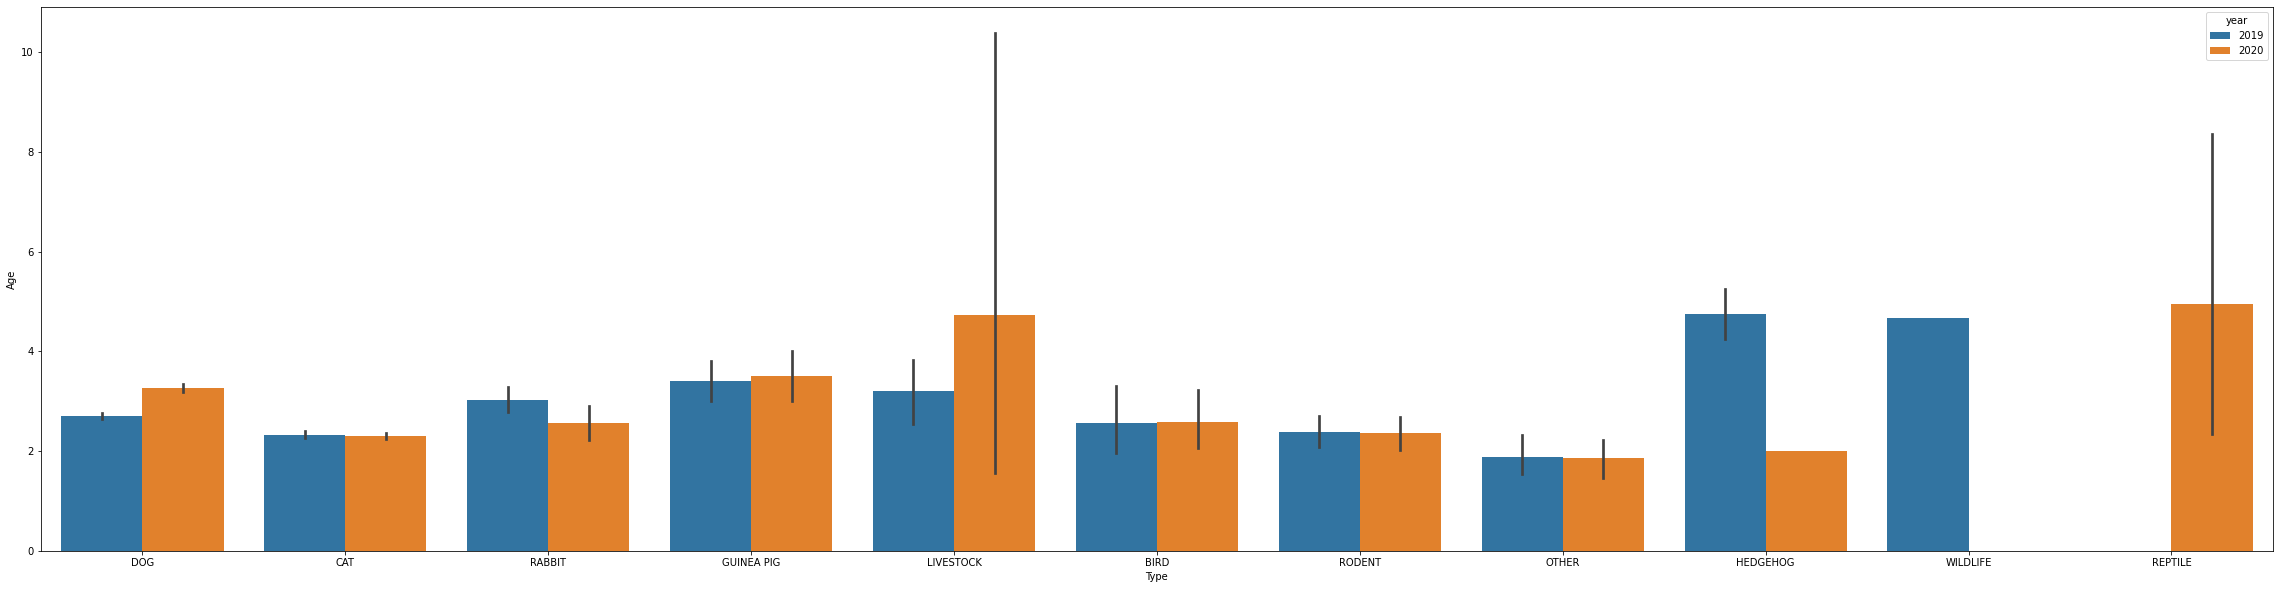

In [37]:
fig, axes = plt.subplots(figsize=(40,10))
Age_compare = sns.barplot(x="Type", y="Age", hue="year", data=combined_total,order=order_total)

In [38]:
# Basic Statistical analysis
overall_adoption_change(combined_total)

Overall Change of Total Adoption Number From 2019 to 2020: -27.48 %
Change of Adoption Number by Type:
Adoption number of RABBIT from 2019 to 2020 changed by -46.11 %
Adoption number of DOG from 2019 to 2020 changed by -30.68 %
Adoption number of CAT from 2019 to 2020 changed by -23.0 %
Adoption number of GUINEA PIG from 2019 to 2020 changed by -60.0 %
Adoption number of LIVESTOCK from 2019 to 2020 changed by -50.0 %
Adoption number of BIRD from 2019 to 2020 changed by -13.11 %
Adoption number of RODENT from 2019 to 2020 changed by -45.45 %
Adoption number of OTHER from 2019 to 2020 changed by -32.5 %
Adoption number of HEDGEHOG from 2019 to 2020 changed by -50.0 %
Adoption number of WILDLIFE from 2019 to 2020 changed by -100.0 %
Adoption number of REPTILE from 2019 to 2020 increased by a number of 4


Based on individual datasets from Long Beach, Sonoma, and Austin as well as combined dataset, there is a clear decrease in pet adoption in 2020 than in 2019. Besides overall decrease, we also observed the skewedness of ages of adopted pets. In general, most adopted pets were cats or dogs, in which most of them were neutered or spayed. 

In [39]:
combined_prop = combined_total.groupby(['year'])['Type'].value_counts(normalize=True).rename("Proportion of Adoption").reset_index()
combined_prop

,year,Type,Proportion of Adoption
0,2019,DOG,0.514571
1,2019,CAT,0.453169
2,2019,RABBIT,0.012280
3,2019,RODENT,0.009099
4,2019,OTHER,0.005090
5,2019,BIRD,0.003881
6,2019,LIVESTOCK,0.001400
7,2019,GUINEA PIG,0.000318
8,2019,HEDGEHOG,0.000127
9,2019,WILDLIFE,0.000064


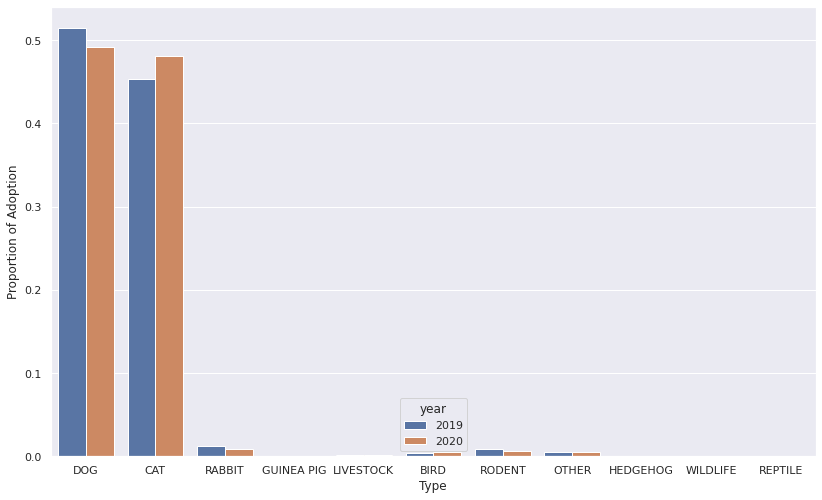

In [40]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
plot_proportion = sns.barplot(x="Type", y="Proportion of Adoption", hue="year", data=combined_prop,order=order_total)

As shown in the graph, animals other than cat and dog take up minimal proportion. From here on, we will only analyze the statistical trends of cat and dog.

In [41]:
# Change of proportion in overall adoption for dogs and cats
combined_dogcat = combined_total[(combined_total['Type']=='DOG') | (combined_total['Type']=='CAT')]
prop_df = combined_dogcat.groupby(['year'])['Type'].value_counts(normalize=True).rename("Proportion of Adoption").reset_index()
prop_df.head()


,year,Type,Proportion of Adoption
0,2019,DOG,0.531725
1,2019,CAT,0.468275
2,2020,DOG,0.505500
3,2020,CAT,0.494500


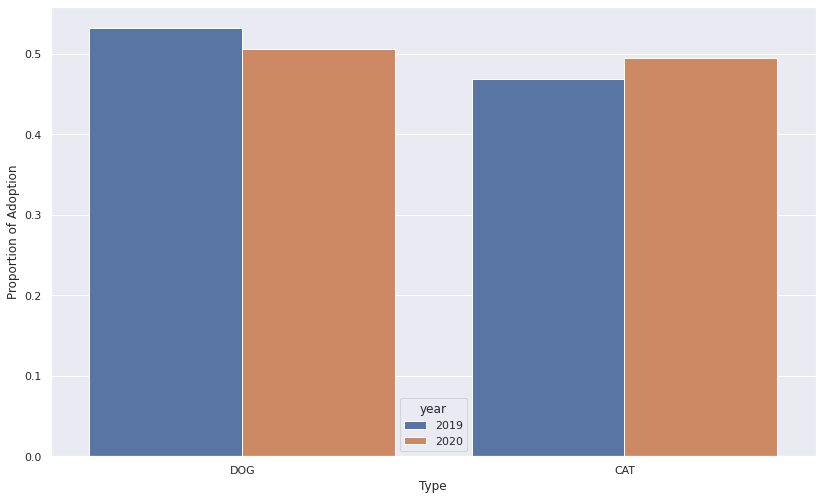

In [42]:
plot_proportion = sns.barplot(x="Type", y="Proportion of Adoption", hue="year", data=prop_df)

In [43]:
# Change of proportion in dog's sex
dog_data = combined_total[combined_total['Type']=='DOG']
dog_prop = dog_data.groupby(['year'])['Sex'].value_counts(normalize=True).rename("Sex Proportion of Dog").reset_index()
dog_prop

,year,Sex,Sex Proportion of Dog
0,2019,Neutered,0.448992
1,2019,Spayed,0.415976
2,2019,Male,0.070607
3,2019,Female,0.064424
4,2020,Neutered,0.461827
5,2020,Spayed,0.420621
6,2020,Male,0.060649
7,2020,Female,0.056903


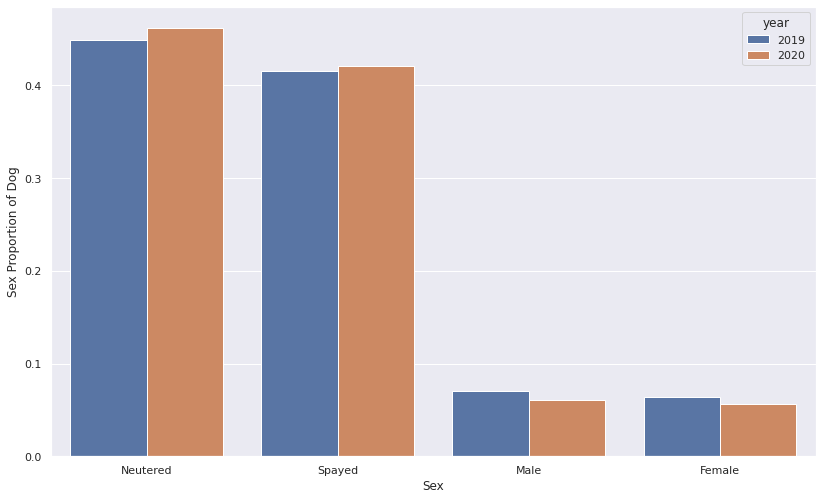

In [44]:
plot_proportion = sns.barplot(x="Sex", y="Sex Proportion of Dog", hue="year", data=dog_prop)

In [45]:
# Change of proportion in cat's sex
cat_data = combined_total[combined_total['Type']=='CAT']
cat_prop = cat_data.groupby(['year'])['Sex'].value_counts(normalize=True).rename("Sex Proportion of Cat").reset_index()
cat_prop

,year,Sex,Sex Proportion of Cat
0,2019,Spayed,0.365066
1,2019,Neutered,0.364926
2,2019,Female,0.141955
3,2019,Male,0.128054
4,2020,Spayed,0.379650
5,2020,Neutered,0.362327
6,2020,Female,0.134209
7,2020,Male,0.123815


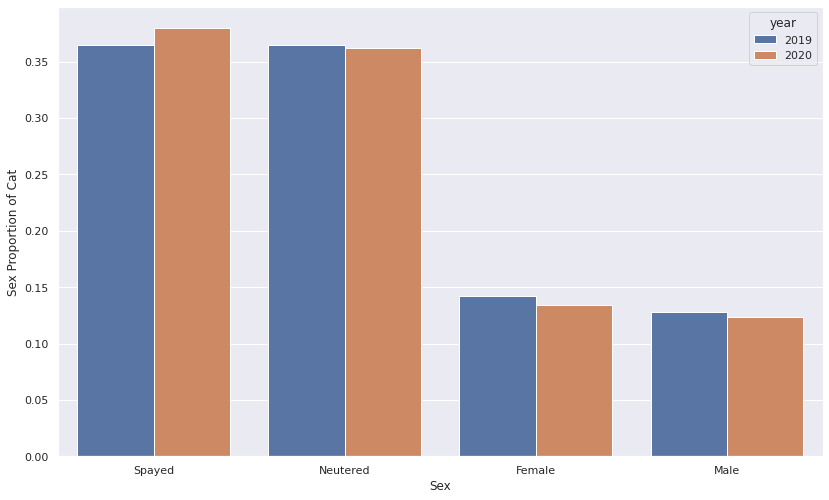

In [46]:
plot_proportion = sns.barplot(x="Sex", y="Sex Proportion of Cat", hue="year", data=cat_prop)

In [47]:
cat_age_2019 =  cat_data[cat_data['year']==2019]['Age'].describe()[1]
dog_age_2019 =  dog_data[dog_data['year']==2019]['Age'].describe()[1]
cat_age_2020 =  cat_data[cat_data['year']==2020]['Age'].describe()[1]
dog_age_2020 =  dog_data[dog_data['year']==2020]['Age'].describe()[1]

statistics = {'year': [2019, 2020, 2019, 2020], 'Type': ['DOG','CAT','DOG','CAT'], 'Mean Age': [dog_age_2019,cat_age_2019,dog_age_2020,cat_age_2020]}
age_comp = pd.DataFrame(data=statistics)
age_comp

,year,Type,Mean Age
0,2019,DOG,2.696922
1,2020,CAT,2.329895
2,2019,DOG,3.267191
3,2020,CAT,2.296014


# Statistical Inference for all six-region combined

year,2019,2020
Type,,
CAT,0.564969,0.435031
DOG,0.590594,0.409406


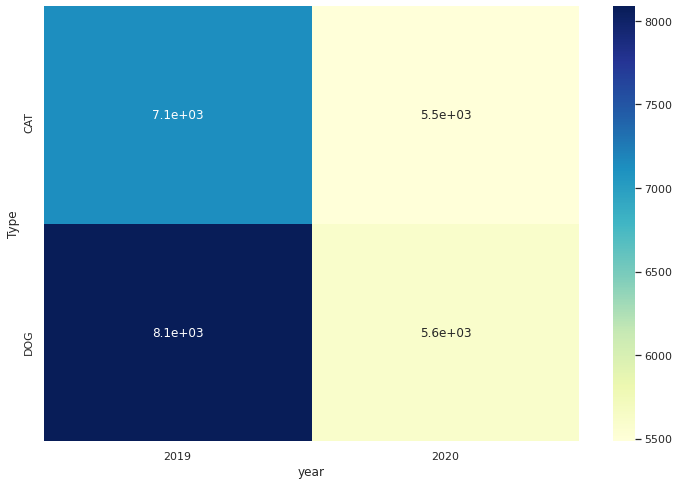

In [48]:
#Type
AC_Type_contigency= pd.crosstab(combined_dogcat['Type'], combined_dogcat['year']) 
AC_Type_contigency_pct = pd.crosstab(combined_dogcat['Type'], combined_dogcat['year'], normalize='index')
plt.figure(figsize=(12,8)) 
sns.heatmap(AC_Type_contigency, annot=True, cmap="YlGnBu")
AC_Type_contigency_pct

In [49]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(AC_Type_contigency)
c, p, dof, expected

(17.567643770786532,
 2.7726611026146857e-05,
 1,
 array([[7290.18799194, 5315.81200806],
        [7918.81200806, 5774.18799194]]))

We set our alpha value as 0.05, and since our df is 1, our critical value would be 3.841. Thus, the test value is smaller than the critical value, and we maintain the null hypothesis that there is no significant differnce between the proportion of cat and dog from 2019 to 2020

year,2019,2020
Sex,,
Female,0.592192,0.407808
Male,0.592726,0.407274
Neutered,0.576532,0.423468
Spayed,0.573241,0.426759


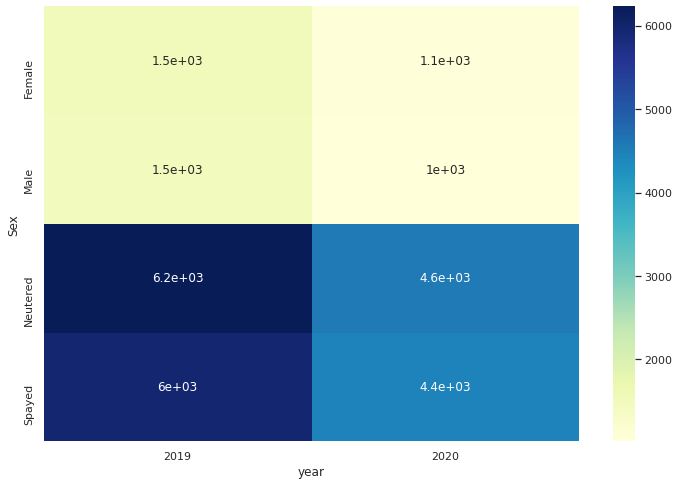

In [50]:
#Sex
AC_Sex_contigency= pd.crosstab(combined_dogcat['Sex'], combined_dogcat['year']) 
AC_Sex_contigency_pct = pd.crosstab(combined_dogcat['Sex'], combined_dogcat['year'], normalize='index')
plt.figure(figsize=(12,8)) 
sns.heatmap(AC_Sex_contigency, annot=True, cmap="YlGnBu")
AC_Sex_contigency_pct

In [51]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(AC_Sex_contigency)
c, p, dof, expected

(5.412679241117877,
 0.14395565657493886,
 3,
 array([[1496.09045971, 1090.90954029],
        [1446.93402791, 1055.06597209],
        [6249.22825963, 4556.77174037],
        [6016.74725275, 4387.25274725]]))

We set our alpha value as 0.05, and since our df is 3, our critical value would be 7.815. Thus, the test value is greater than the critical value, and we reject the null hypothesis and there is a significant differnce between the sex proportion of cat and dog from 2019 to 2020

In [52]:
# t test for all six regions
dog_data = combined_total[combined_total['Type']=='DOG']
cat_data = combined_total[combined_total['Type']=='CAT']

cat_age_2019 =  cat_data[cat_data['year']==2019]['Age']
dog_age_2019 =  dog_data[dog_data['year']==2019]['Age']
cat_age_2020 =  cat_data[cat_data['year']==2020]['Age']
dog_age_2020 =  dog_data[dog_data['year']==2020]['Age']

cat_age_2019 = cat_age_2019.dropna()
dog_age_2019 = dog_age_2019.dropna()
cat_age_2020 = cat_age_2020.dropna()
dog_age_2020 = dog_age_2020.dropna()

In [53]:
# Test for dog
from scipy.stats import ttest_ind, chisquare, normaltest

t_val, p_val = stats.ttest_ind(dog_age_2019, dog_age_2020)
print("t value: ", t_val, "p value: ", p_val)
if p_val < 0.01:
    print('Test for dog accomplished, there is a significant difference in age from 2019 to 2020!')
else:
    print('Test for dog accomplished, there is NOT a significant difference in age from 2019 to 2020!')

t value:  -10.990476611563944 p value:  5.5589020621537025e-28
Test for dog accomplished, there is a significant difference in age from 2019 to 2020!


In [54]:
# Test for cat
from scipy.stats import ttest_ind, chisquare, normaltest

t_val, p_val = stats.ttest_ind(cat_age_2019, cat_age_2020)
print("t value: ", t_val, "p value: ", p_val)
if p_val < 0.01:
    print('Test for cat accomplished, there is a significant difference in age from 2019 to 2020!')
else:
    print('Test for cat accomplished, there is NOT a significant difference in age from 2019 to 2020!')

t value:  0.7400401591818457 p value:  0.45928941088305664
Test for cat accomplished, there is NOT a significant difference in age from 2019 to 2020!


# Combine three Datasets in California regions

After looking at the sample datasets in all six regions in the U.S., We put our focus on the regions in California only, which is Long Beach Region, Sonoma Region, and Sacramento Region.

In [55]:
# Combining dataset from three regions in California
california_2019 = pd.concat([longbeach_2019, sonoma_2019, sacramento_2019], ignore_index=True)
california_2020 = pd.concat([longbeach_2020, sonoma_2020, sacramento_2020], ignore_index=True)
california_2019['Type'] = california_2019['Type'].str.upper()
california_2020['Type'] = california_2020['Type'].str.upper()
california_total = pd.concat([california_2019, california_2020], ignore_index=True)
# Drop Unknown from Sex columns
california_total = california_total[california_total['Sex']!='Unknown']

In [56]:
california_total

,Date,Type,Sex,Age,year
0,2019-01-02 00:00:00,RABBIT,Neutered,5.0,2019
1,2019-01-02 00:00:00,DOG,Spayed,12.0,2019
2,2019-01-03 00:00:00,DOG,Male,4.0,2019
3,2019-01-03 00:00:00,CAT,Neutered,4.0,2019
4,2019-01-03 00:00:00,CAT,Neutered,5.0,2019
...,...,...,...,...,...
6367,2020-03-15,DOG,Spayed,3.0,2020
6368,2020-01-19,DOG,Spayed,6.0,2020
6369,2020-01-10,DOG,Spayed,6.0,2020
6370,2020-03-10,DOG,Neutered,3.0,2020


In [57]:
california_catdog = california_total.loc[(california_total['Type']=='CAT')|(california_total['Type']=='DOG')]
ca_prop_df = california_catdog.groupby(['year'])['Type'].value_counts(normalize=True).rename("Proportion of Adoption").reset_index()
ca_prop_df.head()

,year,Type,Proportion of Adoption
0,2019,CAT,0.615842
1,2019,DOG,0.384158
2,2020,CAT,0.518667
3,2020,DOG,0.481333


In [58]:
california_total['Type'].unique()
order_california = [ 'DOG', 'CAT', 'RABBIT','GUINEA PIG', 'LIVESTOCK', 'BIRD','RODENT']

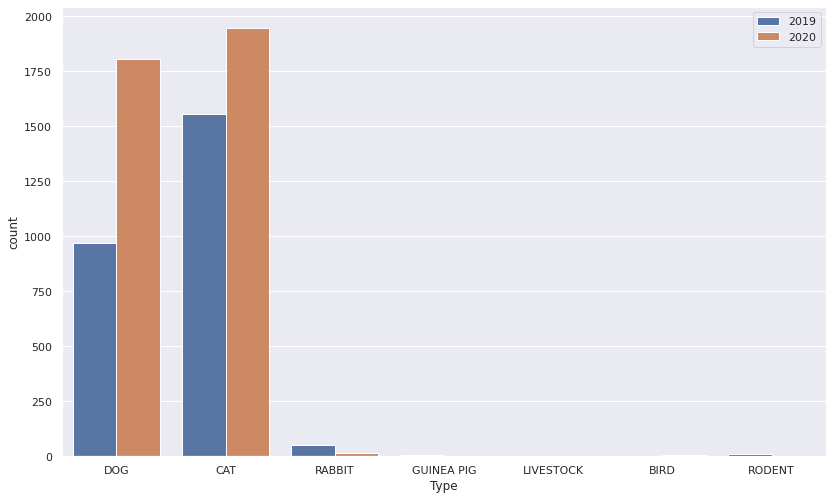

In [59]:
sns.countplot(data = california_total, x = 'Type', hue = 'year',order = order_california)
plt.legend(loc = 'upper right')

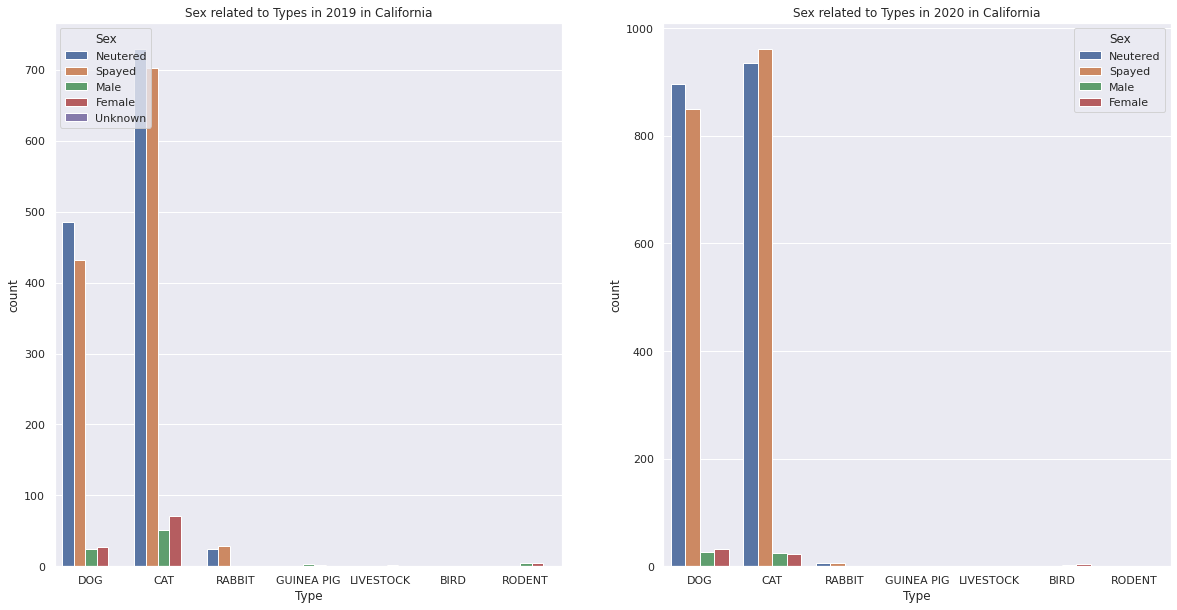

In [60]:
# Sex by type in 2019 vs 2020 in California
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
ax1 = sns.countplot(data = california_2019, x = 'Type',hue = 'Sex', ax = axes[0], order=order_california)
ax2 = sns.countplot(data = california_2020, x = 'Type',hue = 'Sex', ax = axes[1], order=order_california)
ax1.title.set_text('Sex related to Types in 2019 in California')
ax2.title.set_text('Sex related to Types in 2020 in California')

In [61]:
california_total['Age'].max()

30.63

([<matplotlib.axis.XTick at 0x7ff34344a3d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

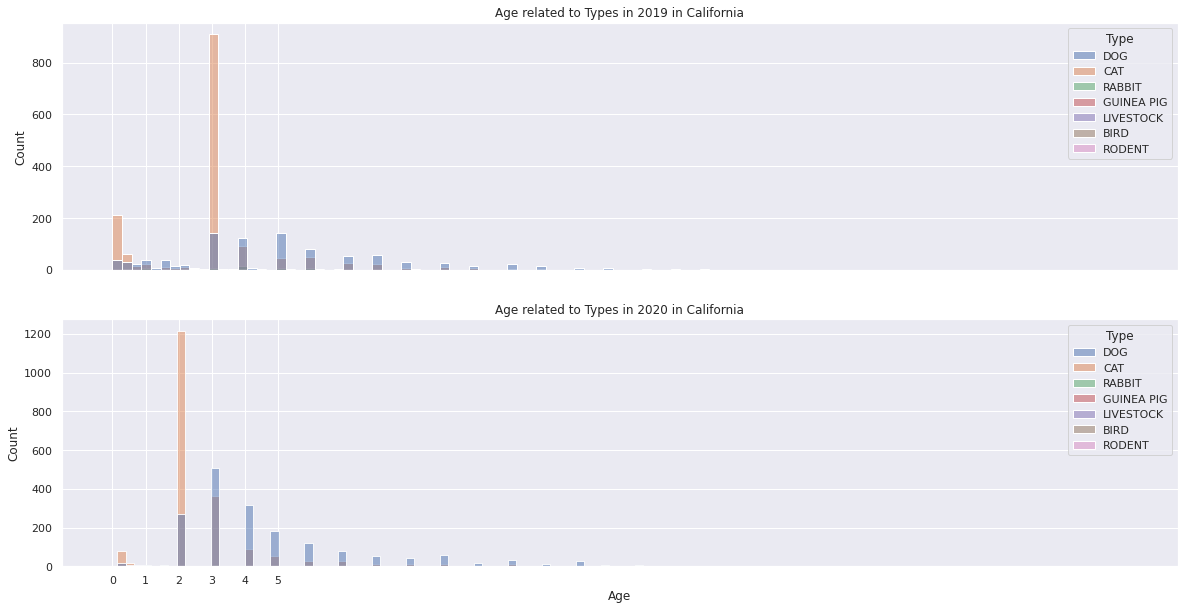

In [62]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,10))
ax1 = sns.histplot(data = california_2019, x = 'Age',hue = 'Type', ax = axes[0],hue_order=order_california)
ax2 = sns.histplot(data = california_2020, x = 'Age',hue = 'Type', ax = axes[1],hue_order=order_california)
ax1.title.set_text('Age related to Types in 2019 in California')
ax2.title.set_text('Age related to Types in 2020 in California')
plt.xticks(range(6))

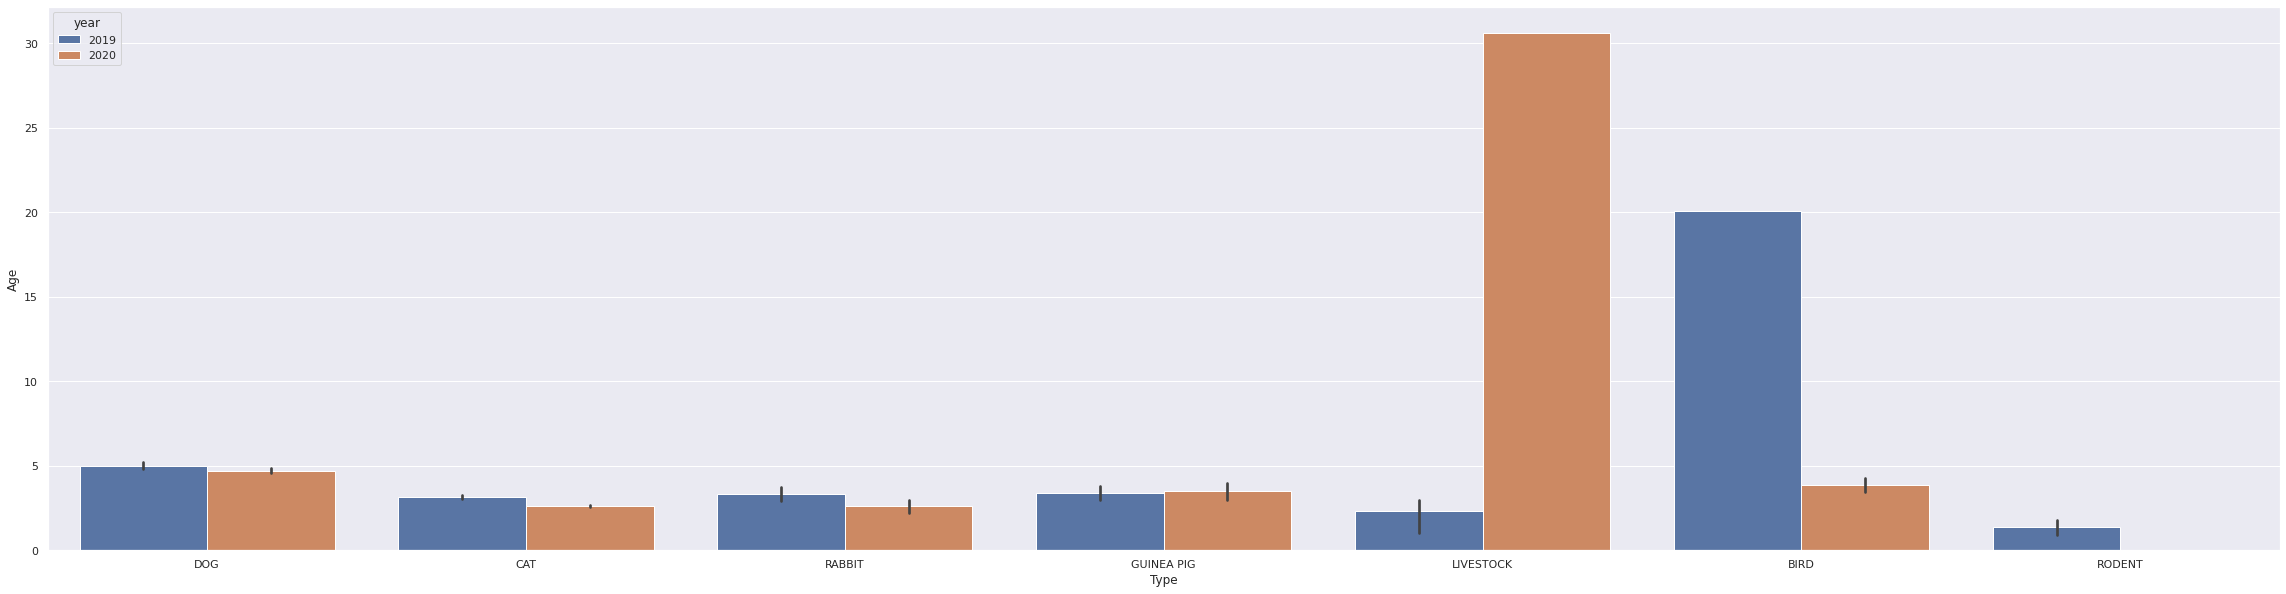

In [63]:
fig, axes = plt.subplots(figsize=(40,10))
Age_california = sns.barplot(x="Type", y="Age", hue="year", data=california_total, order = order_california)

In [64]:
overall_adoption_change(california_total)

Overall Change of Total Adoption Number From 2019 to 2020: 45.38 %
Change of Adoption Number by Type:
Adoption number of RABBIT from 2019 to 2020 changed by -73.58 %
Adoption number of DOG from 2019 to 2020 changed by 86.08 %
Adoption number of CAT from 2019 to 2020 changed by 25.08 %
Adoption number of GUINEA PIG from 2019 to 2020 changed by -60.0 %
Adoption number of LIVESTOCK from 2019 to 2020 changed by -66.67 %
Adoption number of BIRD from 2019 to 2020 changed by 600.0 %
Adoption number of RODENT from 2019 to 2020 changed by -100.0 %


In [65]:
california_prop = california_total.groupby(['year'])['Type'].value_counts(normalize=True).rename("Proportion of Adoption").reset_index()
california_prop

,year,Type,Proportion of Adoption
0,2019,CAT,0.598998
1,2019,DOG,0.373652
2,2019,RABBIT,0.020416
3,2019,RODENT,0.003467
4,2019,GUINEA PIG,0.001926
5,2019,LIVESTOCK,0.001156
6,2019,BIRD,0.000385
7,2020,CAT,0.515368
8,2020,DOG,0.478272
9,2020,RABBIT,0.003710


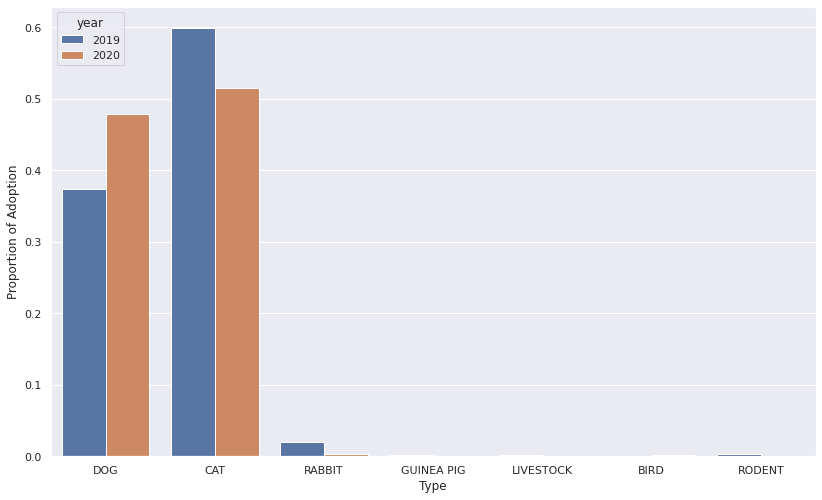

In [66]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
plot_proportion = sns.barplot(x="Type", y="Proportion of Adoption", hue="year", data=california_prop,order = order_california)

In [67]:
california_dogcat = california_total[(california_total['Type']=='DOG') | (california_total['Type']=='CAT')]
cali_prop_df = california_dogcat.groupby(['year'])['Type'].value_counts(normalize=True).rename("Proportion of Adoption").reset_index()
cali_prop_df.head()

,year,Type,Proportion of Adoption
0,2019,CAT,0.615842
1,2019,DOG,0.384158
2,2020,CAT,0.518667
3,2020,DOG,0.481333


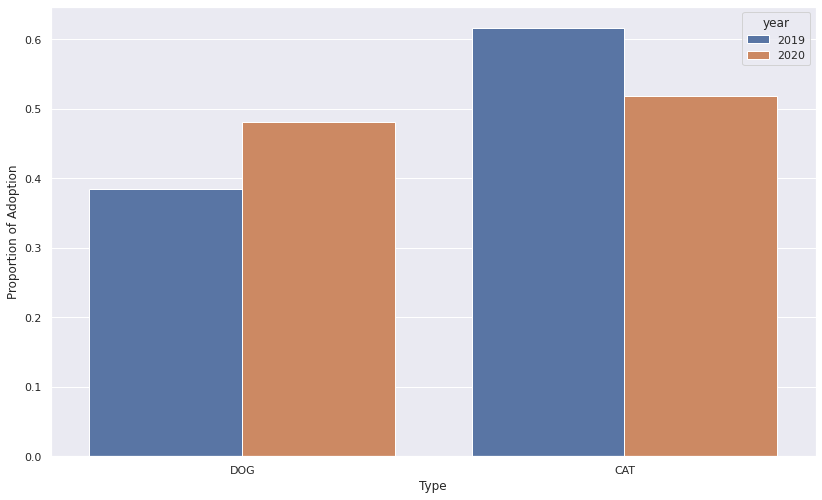

In [68]:
cali_plot_proportion = sns.barplot(x="Type", y="Proportion of Adoption", hue="year", data=cali_prop_df,order = ['DOG','CAT'])

In [69]:
cali_dog_data = california_total[california_total['Type']=='DOG']
cali_dog_prop = dog_data.groupby(['year'])['Sex'].value_counts(normalize=True).rename("Sex Proportion of Dog").reset_index()
cali_dog_prop

,year,Sex,Sex Proportion of Dog
0,2019,Neutered,0.448992
1,2019,Spayed,0.415976
2,2019,Male,0.070607
3,2019,Female,0.064424
4,2020,Neutered,0.461827
5,2020,Spayed,0.420621
6,2020,Male,0.060649
7,2020,Female,0.056903


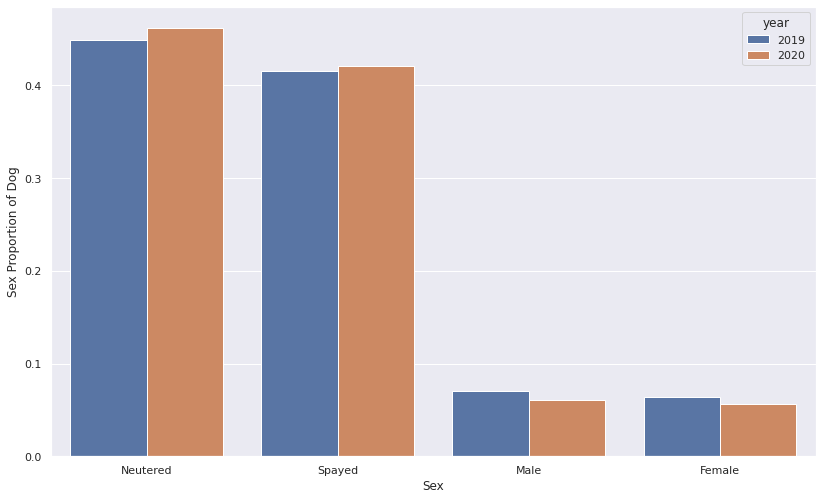

In [70]:
cali_dog_plot_proportion = sns.barplot(x="Sex", y="Sex Proportion of Dog", hue="year", data=cali_dog_prop)

In [71]:
cali_cat_data = california_total[california_total['Type']=='CAT']
cali_cat_prop = cali_cat_data.groupby(['year'])['Sex'].value_counts(normalize=True).rename("Sex Proportion of Cat").reset_index()
cali_cat_prop

,year,Sex,Sex Proportion of Cat
0,2019,Neutered,0.469453
1,2019,Spayed,0.452090
2,2019,Female,0.045659
3,2019,Male,0.032797
4,2020,Spayed,0.494602
5,2020,Neutered,0.480720
6,2020,Male,0.012853
7,2020,Female,0.011825


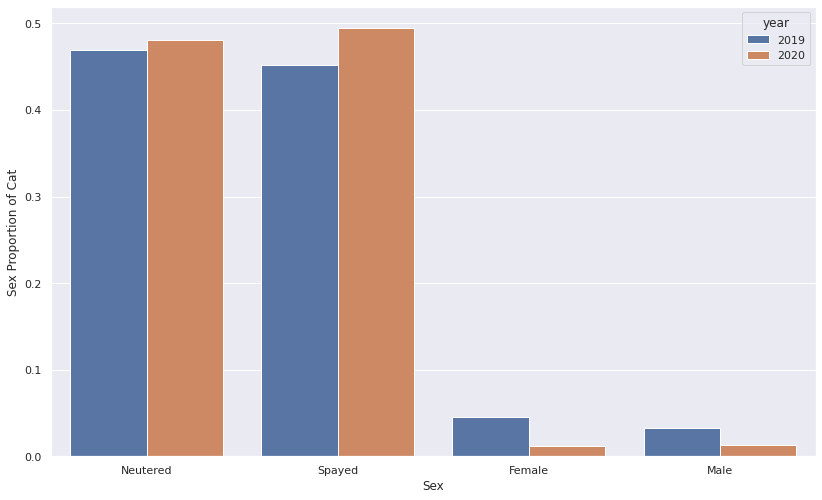

In [72]:
cali_cat_plot_proportion = sns.barplot(x="Sex", y="Sex Proportion of Cat", hue="year", data=cali_cat_prop)

In [73]:
cali_cat_age_2019 =  cali_cat_data[cali_cat_data['year']==2019]['Age'].describe()[1]
cali_dog_age_2019 =  cali_dog_data[cali_dog_data['year']==2019]['Age'].describe()[1]
cali_cat_age_2020 =  cali_cat_data[cali_cat_data['year']==2020]['Age'].describe()[1]
cali_dog_age_2020 =  cali_dog_data[cali_dog_data['year']==2020]['Age'].describe()[1]

cali_stats = {'year': [2019, 2020, 2019, 2020], 'Type': ['DOG','CAT','DOG','CAT'], 'Mean Age': [cali_dog_age_2019,cali_cat_age_2019,cali_dog_age_2020,cali_cat_age_2020]}
cali_age_comp = pd.DataFrame(data=cali_stats)
cali_age_comp

,year,Type,Mean Age
0,2019,DOG,5.015959
1,2020,CAT,3.148178
2,2019,DOG,4.700206
3,2020,CAT,2.622206


# Statistical inference in California

In [74]:
# Combining dataset from three regions
california_2019 = pd.concat([longbeach_2019, sonoma_2019, sacramento_2019], ignore_index=True)
california_2020 = pd.concat([longbeach_2020, sonoma_2020, sacramento_2020], ignore_index=True)
california_2019['Type'] = california_2019['Type'].str.upper()
california_2020['Type'] = california_2020['Type'].str.upper()
california_total = pd.concat([california_2019, california_2020], ignore_index=True)
# Drop Unknown from Sex columns
california_total = california_total[california_total['Sex']!='Unknown']

In [75]:
california_dogcat = california_total[(california_total['Type']=='DOG') | (california_total['Type']=='CAT')]
prop_df = california_dogcat.groupby(['year'])['Type'].value_counts(normalize=True).rename("Proportion of Adoption").reset_index()
prop_df.head()

,year,Type,Proportion of Adoption
0,2019,CAT,0.615842
1,2019,DOG,0.384158
2,2020,CAT,0.518667
3,2020,DOG,0.481333


year,2019,2020
Type,,
CAT,0.444286,0.555714
DOG,0.349550,0.650450


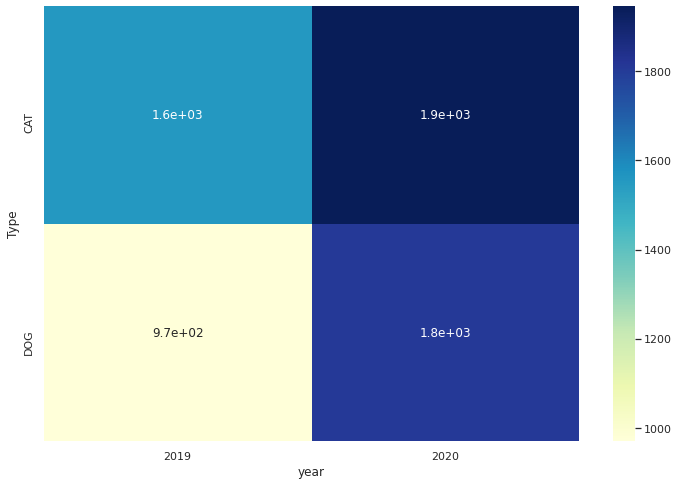

In [76]:
#Type
AC_Type_contigency= pd.crosstab(california_dogcat['Type'], california_dogcat['year']) 
AC_Type_contigency_pct = pd.crosstab(california_dogcat['Type'], california_dogcat['year'], normalize='index')
plt.figure(figsize=(12,8)) 
sns.heatmap(AC_Type_contigency, annot=True, cmap="YlGnBu")
AC_Type_contigency_pct

In [77]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(AC_Type_contigency)
print("p value: ", p)

p value:  3.6029698978654285e-14


We set our alpha value as 0.05, and since our df is 1, our critical value would be 3.841. Thus, the test value is smaller than the critical value, and we maintain the null hypothesis that there is no significant differnce between the proportion of cat and dog from 2019 to 2020

year,2019,2020
Sex,,
Female,0.636364,0.363636
Male,0.598425,0.401575
Neutered,0.399081,0.600919
Spayed,0.385137,0.614863


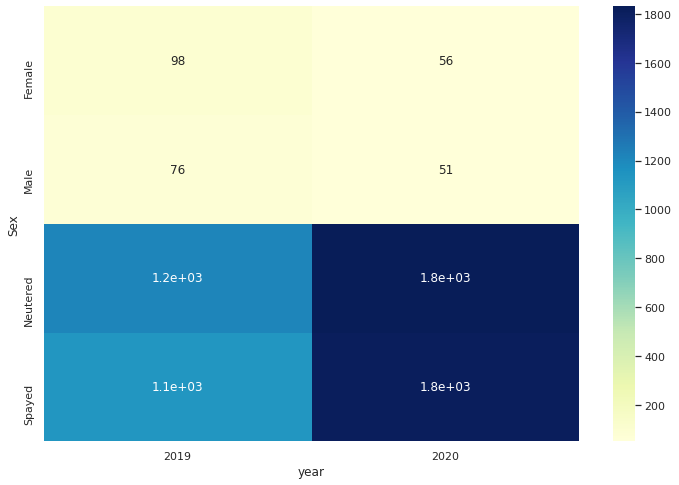

In [78]:
#Sex
AC_Sex_contigency= pd.crosstab(california_dogcat['Sex'], california_dogcat['year']) 
AC_Sex_contigency_pct = pd.crosstab(california_dogcat['Sex'], california_dogcat['year'], normalize='index')
plt.figure(figsize=(12,8)) 
sns.heatmap(AC_Sex_contigency, annot=True, cmap="YlGnBu")
AC_Sex_contigency_pct

In [79]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(AC_Sex_contigency)
p

8.971372313426654e-13

We set our alpha value as 0.05, and since our df is 3, our critical value would be 7.815. Thus, the test value is greater than the critical value, and we reject the null hypothesis and there is a significant differnce between the sex proportion of cat and dog from 2019 to 2020

In [80]:
# t test for california
cali_dog_data = combined_total[combined_total['Type']=='DOG']
cali_cat_data = combined_total[combined_total['Type']=='CAT']

cali_cat_age_2019 =  cali_cat_data[cali_cat_data['year']==2019]['Age']
cali_dog_age_2019 =  cali_dog_data[cali_dog_data['year']==2019]['Age']
cali_cat_age_2020 =  cali_cat_data[cali_cat_data['year']==2020]['Age']
cali_dog_age_2020 =  cali_dog_data[cali_dog_data['year']==2020]['Age']

cali_cat_age_2019 = cali_cat_age_2019.dropna()
cali_dog_age_2019 = cali_dog_age_2019.dropna()
cali_cat_age_2020 = cali_cat_age_2020.dropna()
cali_dog_age_2020 = cali_dog_age_2020.dropna()

In [81]:
# Test for dog
from scipy.stats import ttest_ind, chisquare, normaltest

t_val, p_val = stats.ttest_ind(cali_dog_age_2019, cali_dog_age_2020)
print("t value: ", t_val, "p value: ", p_val)
if p_val < 0.01:
    print('Test for dog accomplished, there is a significant difference in age from 2019 to 2020!')
else:
    print('Test for dog accomplished, there is NOT a significant difference in age from 2019 to 2020!')
t_val, p_val

t value:  -10.990476611563944 p value:  5.5589020621537025e-28
Test for dog accomplished, there is a significant difference in age from 2019 to 2020!


(-10.990476611563944, 5.5589020621537025e-28)

In [82]:
# Test for cat
from scipy.stats import ttest_ind, chisquare, normaltest

t_val, p_val = stats.ttest_ind(cali_cat_age_2019, cali_cat_age_2020)
print("t value: ", t_val, "p value: ", p_val)
if p_val < 0.01:
    print('Test for cat accomplished, there is a significant difference in age from 2019 to 2020!')
else:
    print('Test for cat accomplished, there is NOT a significant difference in age from 2019 to 2020!')

t value:  0.7400401591818457 p value:  0.45928941088305664
Test for cat accomplished, there is NOT a significant difference in age from 2019 to 2020!
